In [1]:
import sys
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import copy
sys.path.insert(0, '/home/ryan/projects/CHARM-KASTr/py/')
from extraction import *
from extraction_scripts import *

Loading in the files (mainly bias and flats)

In [2]:
import glob

import astropy.io.fits as fits

biaspath = "/home/ryan/projects/KASTr_data/raw/1April2019/red/bias/"

flatpath = "/home/ryan/projects/KASTr_data/raw/1April2019/red/flat/"

sciencepath = "/home/ryan/projects/KASTr_data/raw/1April2019/red/science/"

arcpath = "/home/ryan/projects/KASTr_data/raw/1April2019/red/arc/"

darkpath = "/home/ryan/projects/KASTr_data/raw/1April2019/red/dark/"

BIAS = []

FLAT = []

SCIENCE = []

ARC = []

for filename in glob.glob(biaspath + '*.fits'):
    BIAS.append(fits.open(filename))

for filename in glob.glob(flatpath + '*.fits'):
    FLAT.append(fits.open(filename))

for filename in glob.glob(sciencepath + '*.fits'):
    SCIENCE.append(fits.open(filename))

for filename in glob.glob(arcpath + '*.fits'):
    ARC.append(fits.open(filename))

Making the median bias frame and the median flat frame.
Subtracting the bias from the flat, creating the mask, and normalizing the flat.

In [3]:
median_biasframe = cube_median(BIAS)

median_flatframe = cube_median(FLAT)

bias_subtracted_flat = bias_subtract(median_flatframe, median_biasframe)

image_mask = create_mask(bias_subtracted_flat, median_biasframe)

norm_flat = normalize_flat(bias_subtracted_flat, image_mask)

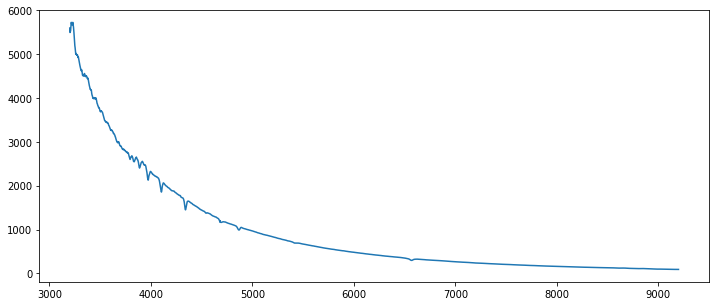

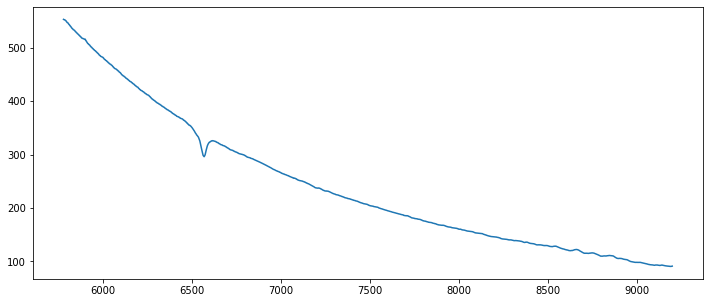

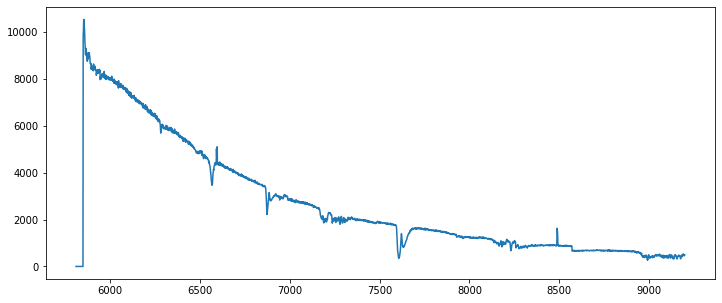

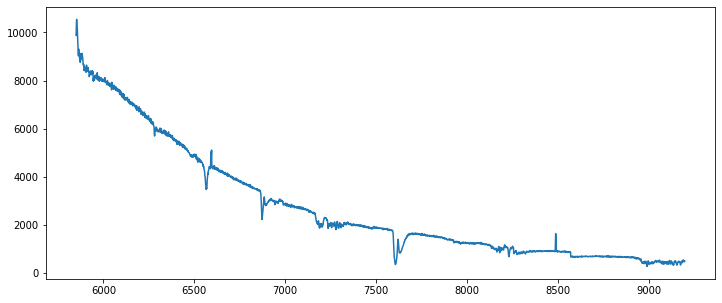

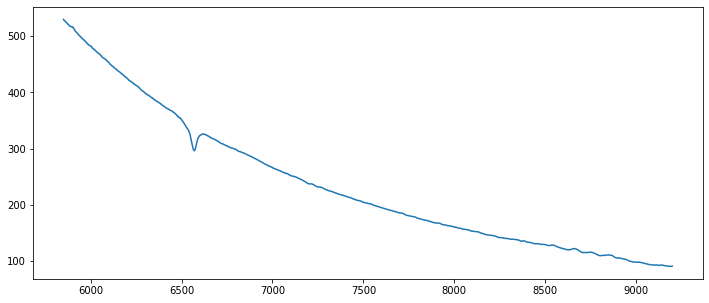

In [4]:
import pandas as pd

flxmod = "/home/ryan/projects/KASTr_data/Flux_Standards/ffeige67.dat"

flxpath = "/home/ryan/projects/data_prods/190401/flux_calibrator/FEIGE67 - Exposure 2.csv"

wavemod = np.loadtxt('/home/ryan/projects/CHARM-KASTr/models/refined_wavecal.txt')
wavecal = np.poly1d(wavemod)

df = pd.read_csv( flxpath )

pixels = df.values[:, 0]

fluxes = df.values[:, 2]


df1 = np.loadtxt( flxmod)

flxwave = df1[:, 0]

flxflx = df1[:, 1]

waves = wavecal( pixels )

plt.figure(figsize=[12,5])
plt.plot(flxwave, flxflx)
plt.show()

flxflx = flxflx[ flxwave>= 5780 ]
flxwave = flxwave[ flxwave >= 5780 ]

plt.figure(figsize=[12,5])
plt.plot(flxwave, flxflx)
plt.show()


fluxes = fluxes[ waves <= 9200]
waves = waves[ waves <= 9200]

plt.figure(figsize=[12,5])
plt.plot(waves, fluxes)
plt.show()

waves = waves[ fluxes > 200]
fluxes = fluxes[fluxes > 200]

plt.figure(figsize=[12,5])
plt.plot(waves, fluxes)
plt.show()

flxflx = flxflx[ flxwave >= np.amin(waves)]
flxwave = flxwave[ flxwave >= np.amin(waves)]

plt.figure(figsize=[12,5])
plt.plot(flxwave, flxflx)
plt.show()

1314
1314
1314
1314


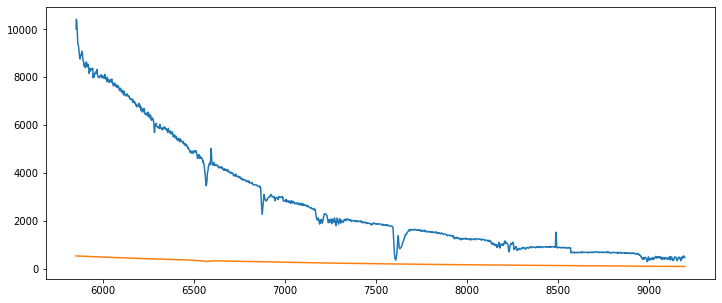

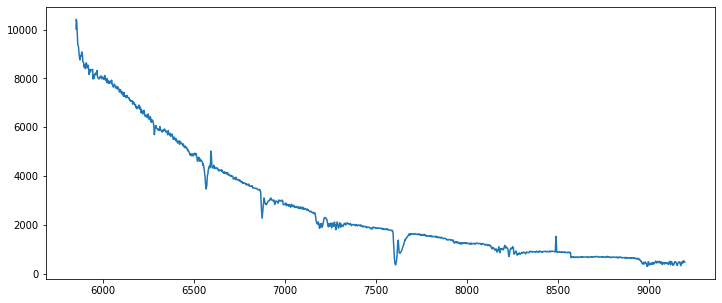

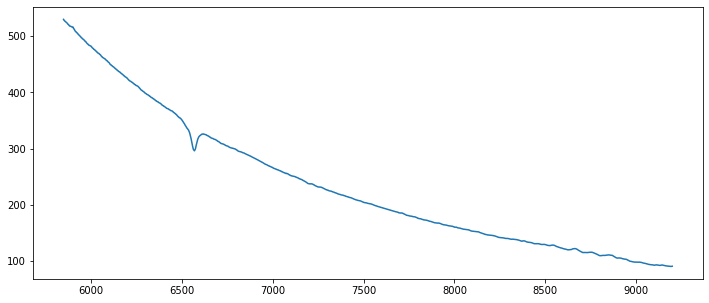

In [6]:


'''
Abandstart = 7600
Abandend = 7630

Bbandstart = 6860
Bbandend = 6890

Tstart = 7170
Tend = 7350
'''

roundedwaves = np.around(waves)

wavecorrespondence = np.in1d( roundedwaves, flxwave)

flxwavecorrespondence = np.in1d( flxwave, roundedwaves )


correspondingfluxes = fluxes[ wavecorrespondence ]
correspondingwaves = waves[ wavecorrespondence ]

correspondingflxflx = flxflx[ flxwavecorrespondence]
correspondingflxwave = flxwave[ flxwavecorrespondence]

print(len(correspondingfluxes))
print(len(correspondingwaves))

print(len(correspondingflxflx))
print(len(correspondingflxwave))

plt.figure(figsize=[12,5])
plt.plot(correspondingwaves, correspondingfluxes)
plt.plot(correspondingflxwave, correspondingflxflx)

plt.show()

plt.figure(figsize=[12,5])
plt.plot(correspondingwaves, correspondingfluxes)


plt.show()

plt.figure(figsize=[12,5])

plt.plot(correspondingflxwave, correspondingflxflx)

plt.show()

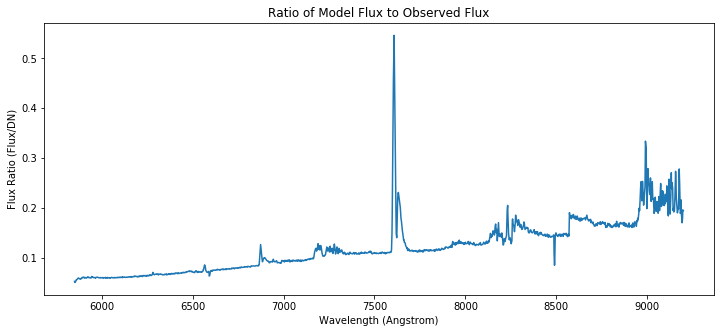

[5850.45610687 5851.67013507 5854.09859149 ... 9194.3255945  9195.56128354
 9198.03233405]
[5850. 5852. 5854. ... 9194. 9196. 9198.]


In [7]:
fluxratios = np.divide( correspondingflxflx, correspondingfluxes)

plt.figure(figsize=[12,5])
plt.plot(correspondingwaves, fluxratios)

plt.title('Ratio of Model Flux to Observed Flux')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux Ratio (Flux/DN)')

#plt.savefig('FluxRatios.png')

plt.show()

print(correspondingwaves)
print(correspondingflxwave)


[7570.22379851 7571.52818243 7574.13695754 7578.05013699 7581.96333434
 7585.8765471  7588.48536295 7589.78977279 7592.39859586 7593.70300891
 7596.31183755 7597.61625296 7600.22508552 7601.52950247 7604.13833727
 7608.05159031 7611.96484217 7615.87809034 7618.48691917 7619.79133233
 7622.40015568 7623.70456567 7626.31338186 7627.61778786 7630.22659524
 7631.53099642 7634.13979332 7638.05297363 7641.96613367 7645.87927097
 7648.4880153  7649.79238303 7652.40110916 7653.70546737 7656.31417364
 7657.61852152 7660.22720627 7661.53154298 7664.14020457 7668.05316604
 7671.96608821 7675.87896859 7678.48753108 7679.79180472 7682.40033632
 7683.7045941  7686.31309316 7687.61733426 7690.22579913 7691.53002272]


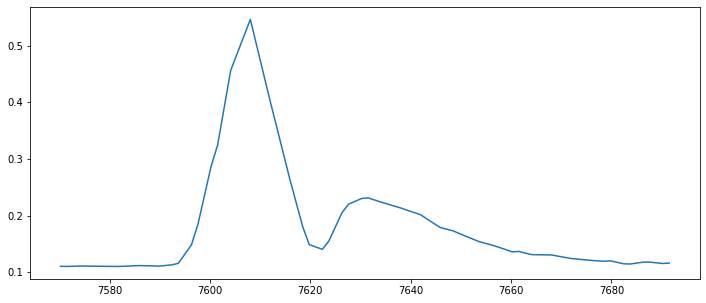

In [8]:
tellurics1 = correspondingwaves[ 680:730 ]

print(tellurics1)

telluricflxs1 = fluxratios[ 680:730 ]

plt.figure(figsize=[12,5])
plt.plot(tellurics1, telluricflxs1)
plt.show()

[6851.92003526 6854.49745587 6855.78624796 6858.36399521 6859.65295019
 6862.23102236 6863.52013936 6866.09853471 6869.96652967 6873.83500465
 6876.41425336 6877.70395705 6880.28352261 6881.57338429 6884.15326496
 6888.02347782 6891.89415861 6894.47487114 6895.76530472 6898.34632603]


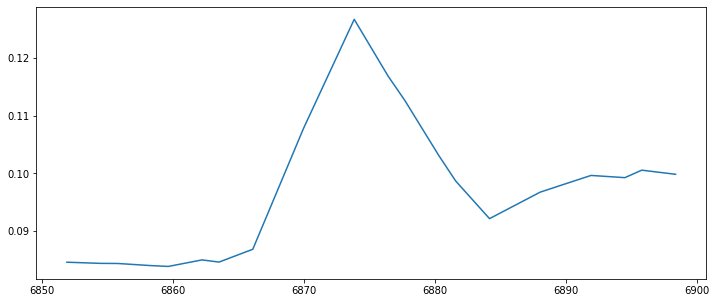

In [9]:
#print(np.argwhere(correspondingwaves < 6890))
#print(np.argwhere(correspondingwaves > 6860))

tellurics2 = correspondingwaves[ 400:420 ]


print(tellurics2)

telluricflxs2 = fluxratios[ 400:420 ]

plt.figure(figsize=[12,5])
plt.plot(tellurics2, telluricflxs2)
plt.show()

[7101.53416569 7104.12909074 7108.02174853 7111.91472829 7115.80802746
 7118.40373643 7119.70164349 7122.29756227 7123.59557381 7126.1917007
 7130.08614916 7133.9809051  7137.87596595 7140.47284133 7141.77132917
 7144.3684047  7145.66699219 7148.26426617 7149.56295247 7152.1604232
 7156.05687322 7159.95361368 7163.85064203 7166.44881961 7167.74795572
 7170.3463221  7171.64555219 7174.24410568 7175.5434289  7178.14216779
 7182.04050588 7185.93911741 7189.83799982 7192.43740399 7193.73715056
 7196.33673221 7197.63656709 7200.23632451 7201.53624686 7204.13617836
 7208.0362912  7211.93666049 7215.83728368 7218.43783894 7219.73815823
 7222.33887965 7223.63928159 7226.24016748 7227.54065123 7230.14169988
 7234.04347431 7237.94548822 7241.84773909 7244.44937005 7245.75022436
 7248.35201017 7249.65294149 7252.25488047 7253.55588795 7256.1579784
 7260.06130142 7263.964847   7267.86861259 7270.47124396 7271.77259565
 7274.3753706  7275.67679366 7278.27971048 7279.58120406 7282.18426109
 7286.089

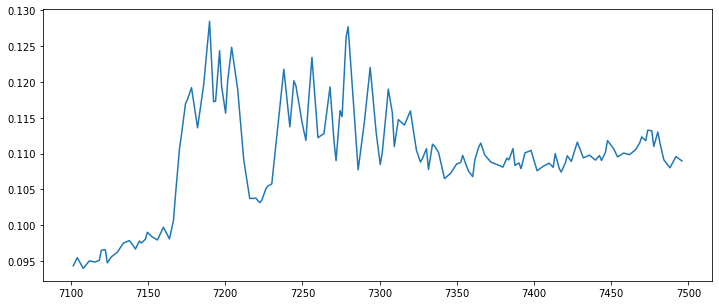

In [10]:
#print(np.argwhere(correspondingwaves < 7350))
#print(np.argwhere(correspondingwaves > 7170))


tellurics3 = correspondingwaves[ 500:650 ]


print(tellurics3)

telluricflxs3 = fluxratios[ 500:650 ]

plt.figure(figsize=[12,5])
plt.plot(tellurics3, telluricflxs3)
plt.show()


[8082.11463956 8086.00943634 8089.90393148 8093.79812258 8096.39407987
 8097.69200721 8100.28775884 8101.58558294 8104.1811273  8108.07418284
 8111.96692303 8115.85934547 8118.45411602 8119.75144772 8122.34600348
 8123.64322737 8126.23756672 8127.53468201 8130.12880334 8134.01971091
 8137.91028703 8141.80052927 8144.39383741 8145.69043522 8148.28351783
 8149.58000246 8152.17285794 8156.06185532 8159.95050756 8163.83881225
 8166.43082111 8167.72676699 8170.3185412  8171.61436935 8174.2059073
 8175.50161693 8178.09291702 8181.97956794 8185.86585765 8188.4565156
 8189.75178375 8192.34219795 8193.63734382 8196.22751267 8197.52253547
 8200.11245735 8203.9970296  8207.88122699 8210.47048249 8211.76504714
 8214.3540498  8215.64848763 8218.23723584 8219.53154605 8222.12003822
 8226.00245454 8229.88448239 8232.47228395 8233.76611936 8236.35365901
 8237.64736306 8240.23463919 8241.52821109 8244.1152221  8247.99540533
 8251.8751865  8254.46148271 8255.75456318 8258.34058842 8259.633533
 8262.2192

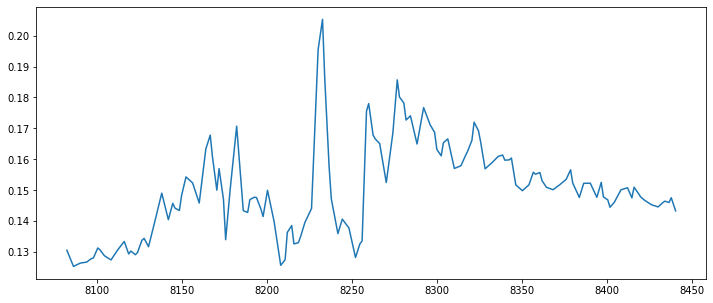

In [11]:
#print(np.argwhere(correspondingwaves < 8400))
#print(np.argwhere(correspondingwaves > 8200))


tellurics4 = correspondingwaves[ 880:1020 ]


print(tellurics4)

telluricflxs4 = fluxratios[ 880:1020 ]

plt.figure(figsize=[12,5])
plt.plot(tellurics4, telluricflxs4)
plt.show()


[8393.8348658  8396.41018345 8397.69776005 8400.27274835 8401.56015988
 8404.13481723 8407.99638771 8411.85745741 8414.4312245  8415.71802397
 8418.2914543  8419.578085   8422.151177   8426.0103902  8429.86909155
 8432.44127358 8433.72727867 8436.29911656 8437.58494918 8440.15644135
 8444.01324558 8447.86952688 8450.44008939 8451.72528288 8454.29549387
 8455.5805112  8458.15036909 8462.0047127  8465.85852231 8468.42743089
 8469.71179556 8472.28034525 8473.56453009 8476.1327193  8479.98455069
 8483.83583703 8486.40305729 8487.68657597 8490.25342998 8491.53676513
 8494.10325131 8497.95251894 8501.80123049 8504.36672809 8505.64938359
 8508.21450759 8512.06172471 8515.9083771  8518.47249711 8519.75446238
 8522.31820301 8523.5999782  8526.16333788 8530.00789935 8533.85188507
 8536.41422119 8537.69529268 8540.25724208 8541.53811981 8544.09968092
 8547.94153536 8551.78280304 8554.34332102 8555.62348161 8558.18360554
 8562.02329701 8565.8623931  8568.42145855 8569.70089143 8572.25955707
 8573.

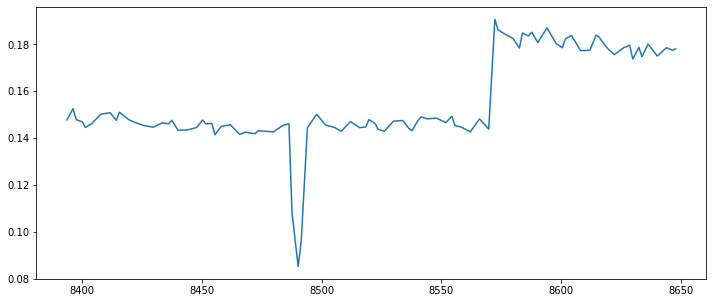

In [12]:
#print(np.argwhere(correspondingwaves < 8500))
#print(np.argwhere(correspondingwaves > 8400))


tellurics5 = correspondingwaves[ 1000:1100 ]


print(tellurics5)

telluricflxs5 = fluxratios[ 1000:1100 ]

plt.figure(figsize=[12,5])
plt.plot(tellurics5, telluricflxs5)
plt.show()


[8889.76107911 8892.28059651 8893.54022236 8896.05920791 8899.83701961
 8902.35511534 8903.61402932 8906.1315891  8909.90725701 8912.42392013
 8913.68211679 8916.19823986 8919.97174761 8922.4869672  8923.74444106
 8926.25911651 8927.51631793 8930.03044771 8933.80095848 8936.31417539
 8937.57064651 8940.08331367 8943.85162538 8946.36337285 8947.61910823
 8950.13030186 8953.89639816 8956.40666529 8957.66165948 8960.17136868
 8963.93523324 8966.44400913 8967.69825668 8970.20647056 8973.96808704
 8976.47536082 8977.72885628 8980.23556396 8983.99491604 8987.75341477
 8990.25860537 8991.51105785 8994.01567674 8997.77188864 9000.27555129
 9001.52723878 9004.03032565 9007.78423443 9010.28635827 9011.53727534
 9014.03881933 9017.7904087  9020.29098289 9021.5411241  9024.04111436
 9027.79036805 9030.28938172 9031.53874167 9034.03716735 9037.78406909
 9040.28151141 9041.53008466 9044.02693493 9047.77146847 9050.2673286
 9051.51510974 9054.01037376 9057.75252285 9060.24678996 9063.98744053
 9066.4

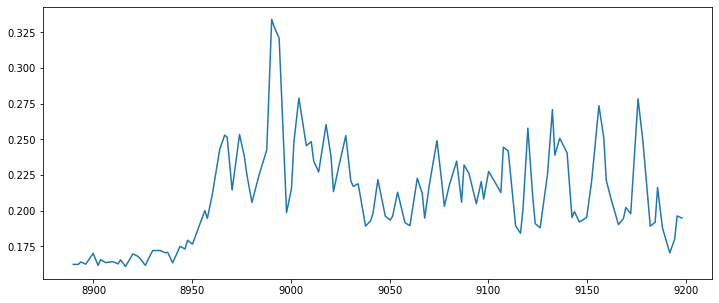

In [13]:
#print(np.argwhere(correspondingwaves < 8500))
#print(np.argwhere(correspondingwaves > 8900))


tellurics6 = correspondingwaves[ 1190: ]


print(tellurics6)

telluricflxs6 = fluxratios[ 1190: ]

plt.figure(figsize=[12,5])
plt.plot(tellurics6, telluricflxs6)
plt.show()


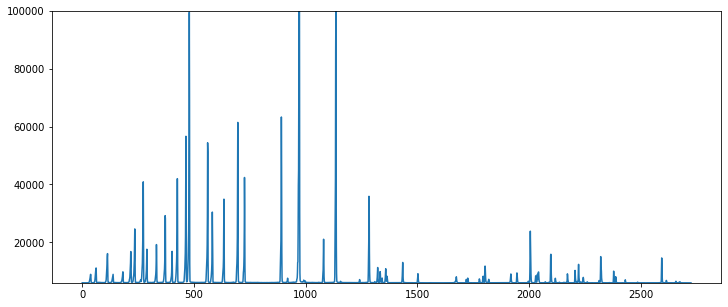

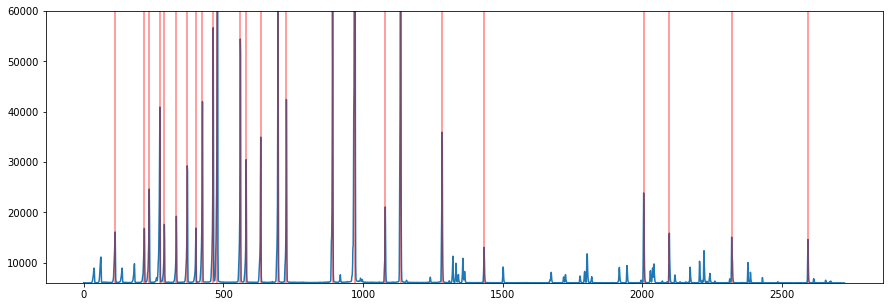

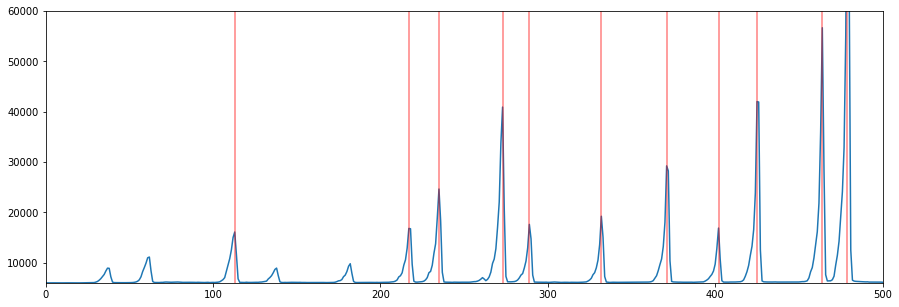

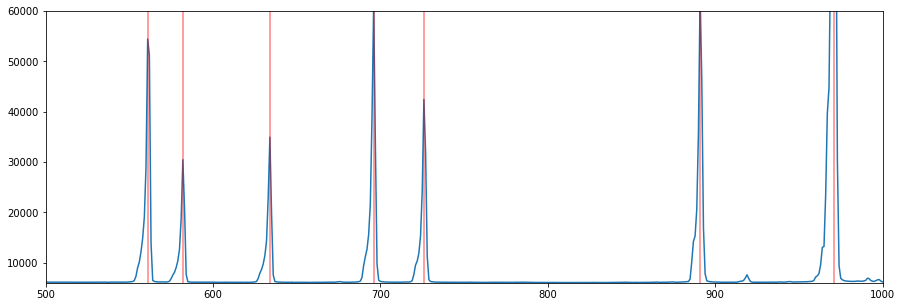

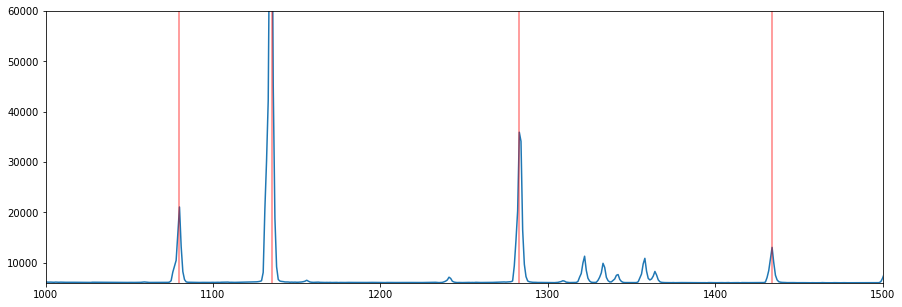

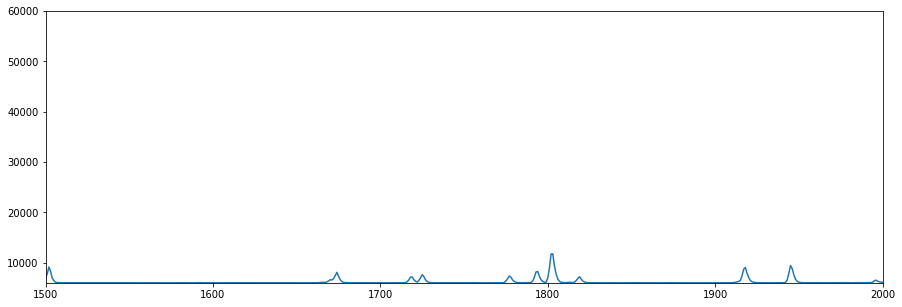

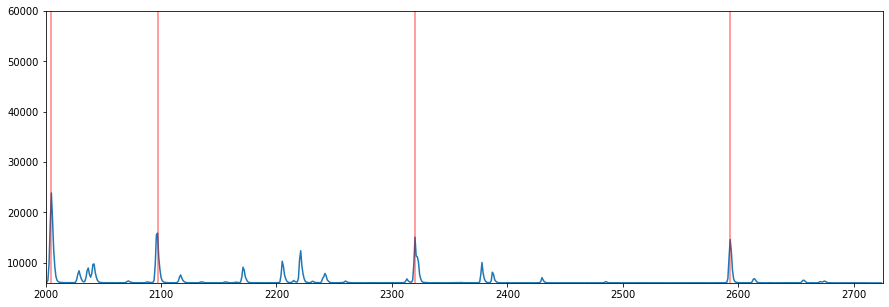

In [5]:
arcp = '/home/ryan/projects/KASTr_data/raw/data-2019-03-31-shane-Adam.Burgasser/red/1077/arc/r1001.fits'

arcd = copy.deepcopy(fits.open(arcp)[0].data)

pfit = np.poly1d(stdpmod)

arc_slc = []

for i in range(len(arcd[:,0])):
    slc = arcd[i,:]
    arc_slc.append(slc[ int(np.around(pfit(i) - 3)):int(np.around(pfit(i) + 3))])

arc_flx = np.sum(arc_slc, axis=1)

plt.figure(figsize=[12,5])
plt.plot(arc_flx)
plt.ylim([6000, 100000])
plt.show()

local_max  = []

px_rad = 10

min_int = 0.06


for i, value in enumerate(arc_flx):
    
    if (i < px_rad) or (i > len(arc_flx) - px_rad - 1):
        continue
    
    if arc_flx[i] < np.amax(arc_flx) * min_int:
        continue
    
    flx_bin = arc_flx[i - px_rad : i + px_rad ]
    
    flx_bin = np.delete(flx_bin, px_rad)
    
    if (np.amax(flx_bin) >= arc_flx[i]):
        continue
    
    local_max.append(i)
    
plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for lmax in local_max:
    plt.axvline( lmax, color='r', alpha=0.5)
plt.ylim([6000, 60000])
plt.show()


plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for lmax in local_max:
    plt.axvline( lmax, color='r', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([0, 500])
plt.show()

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for lmax in local_max:
    plt.axvline( lmax, color='r', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([500, 1000])
plt.show()

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for lmax in local_max:
    plt.axvline( lmax, color='r', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([1000, 1500])
plt.show()

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for lmax in local_max:
    plt.axvline( lmax, color='r', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([1500, 2000])
plt.show()

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for lmax in local_max:
    plt.axvline( lmax, color='r', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([2000, len(arc_flx)])
plt.show()


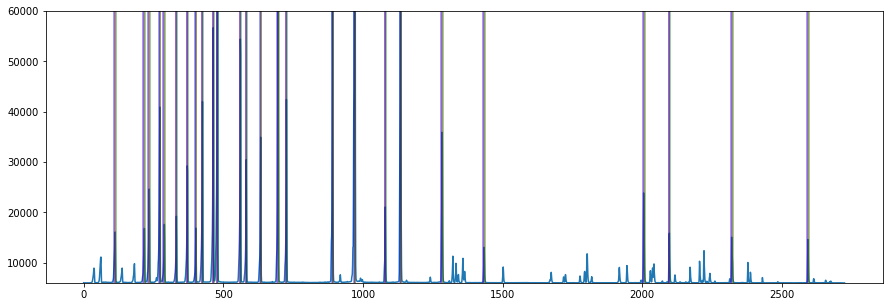

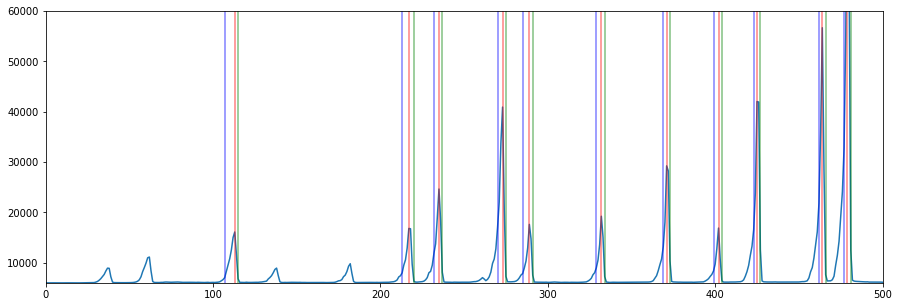

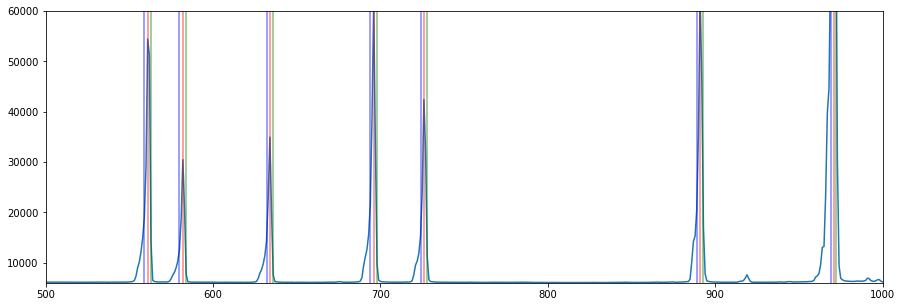

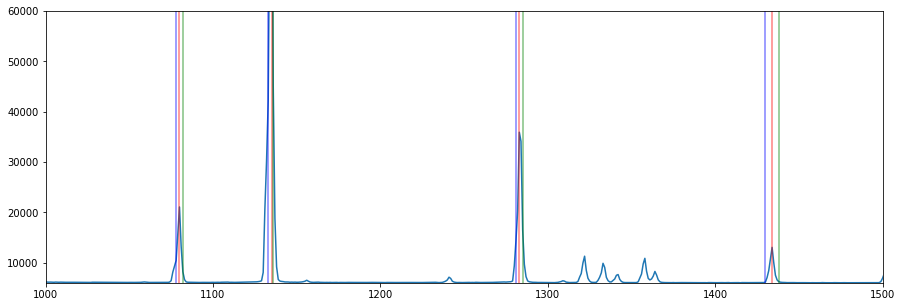

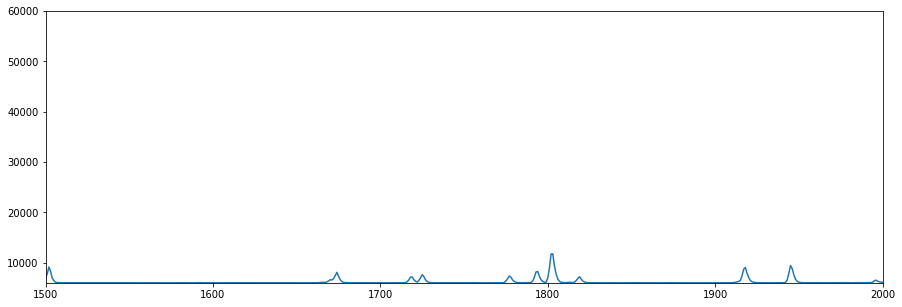

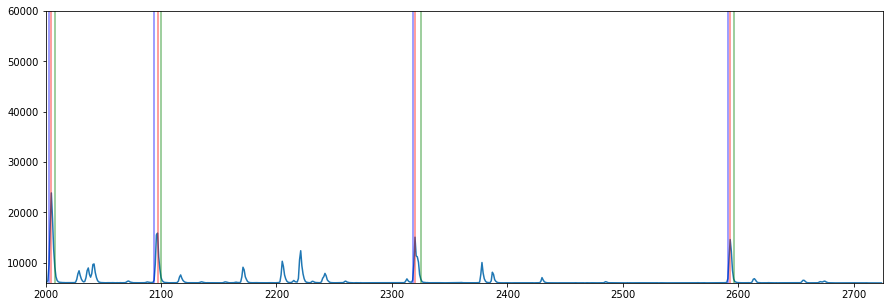

In [6]:
redge = []
ledge = []

positions = np.arange(len(arc_flx))

for i, lmax in enumerate(local_max):
    max_flx = arc_flx[ lmax ]
    
    half_flx = max_flx / 2.
    
    
    outside = arc_flx < half_flx
    
    left = max(positions[(positions < lmax) & outside])
    right = min( positions[ (positions>lmax) & outside])
    
    ledge.append(left)
    
    redge.append(right)
    
    
plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, lmax in enumerate(local_max):
    plt.axvline( lmax, color='r', alpha=0.5)
    plt.axvline( redge[i], color='g', alpha=0.5)
    plt.axvline( ledge[i], color='b', alpha=0.5)
plt.ylim([6000, 60000])
plt.show()

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, lmax in enumerate(local_max):
    plt.axvline( lmax, color='r', alpha=0.5)
    plt.axvline( redge[i], color='g', alpha=0.5)
    plt.axvline( ledge[i], color='b', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([0, 500])
plt.show()

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, lmax in enumerate(local_max):
    plt.axvline( lmax, color='r', alpha=0.5)
    plt.axvline( redge[i], color='g', alpha=0.5)
    plt.axvline( ledge[i], color='b', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([500, 1000])
plt.show()

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, lmax in enumerate(local_max):
    plt.axvline( lmax, color='r', alpha=0.5)
    plt.axvline( redge[i], color='g', alpha=0.5)
    plt.axvline( ledge[i], color='b', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([1000, 1500])
plt.show()

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, lmax in enumerate(local_max):
    plt.axvline( lmax, color='r', alpha=0.5)
    plt.axvline( redge[i], color='g', alpha=0.5)
    plt.axvline( ledge[i], color='b', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([1500, 2000])
plt.show()

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, lmax in enumerate(local_max):
    plt.axvline( lmax, color='r', alpha=0.5)
    plt.axvline( redge[i], color='g', alpha=0.5)
    plt.axvline( ledge[i], color='b', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([2000, len(arc_flx)])
plt.show()

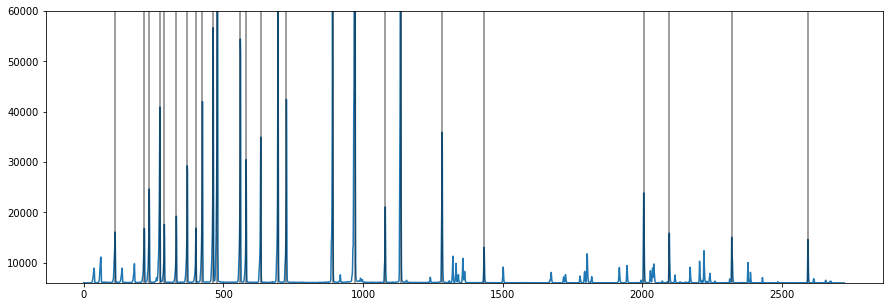

In [7]:
max_width = 50

cents = []

for i, lmax in enumerate(local_max):
    
    if (redge[i] - ledge[i] > max_width):
        continue
        
    inside = (positions >= ledge[i]) & (positions <= redge[i])
    
    centroid = np.sum( positions[inside] * arc_flx[inside] )/ np.sum( arc_flx[inside] )
    
    cents.append(centroid)
    
    
plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for centroid in cents:
    plt.axvline( centroid, color='k', alpha=0.5)
plt.ylim([6000, 60000])
plt.show()

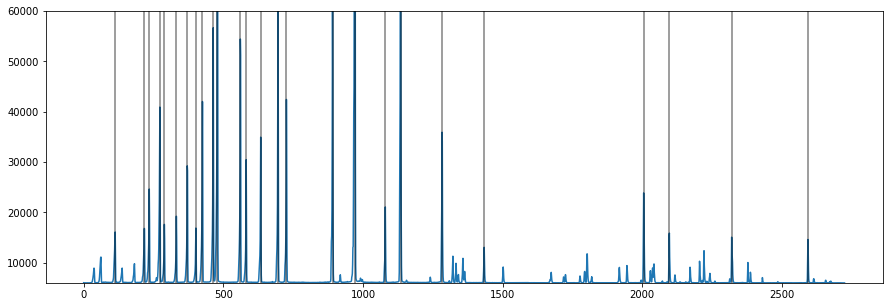

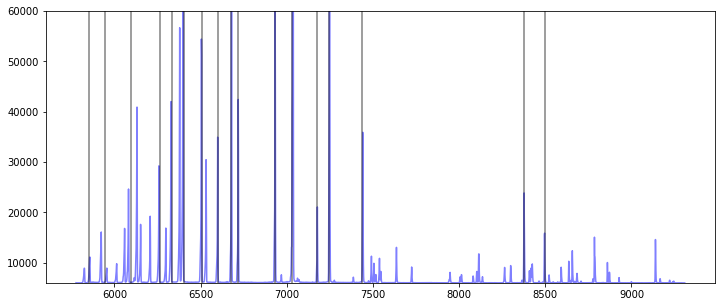

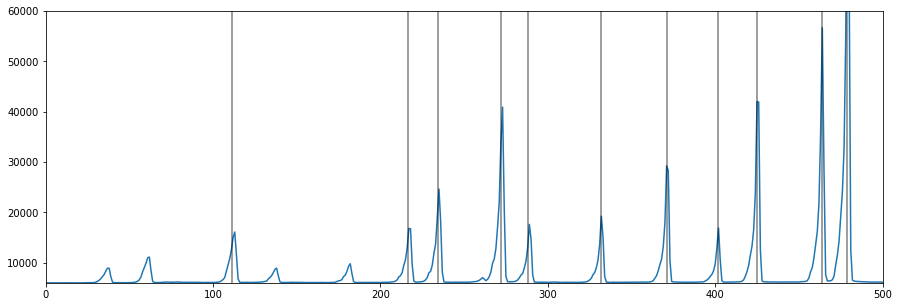

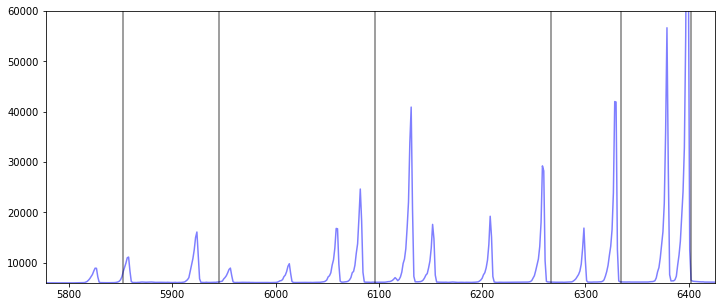

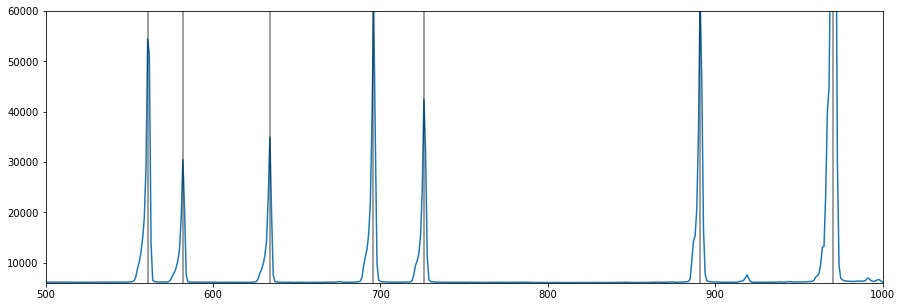

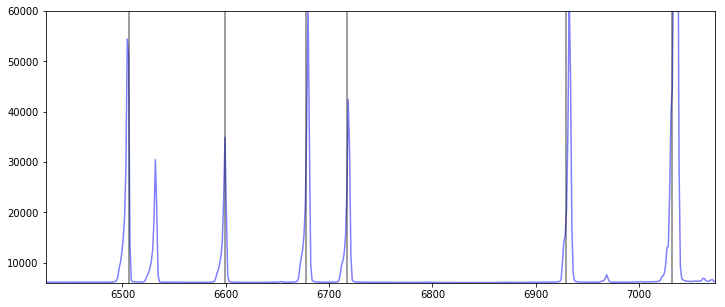

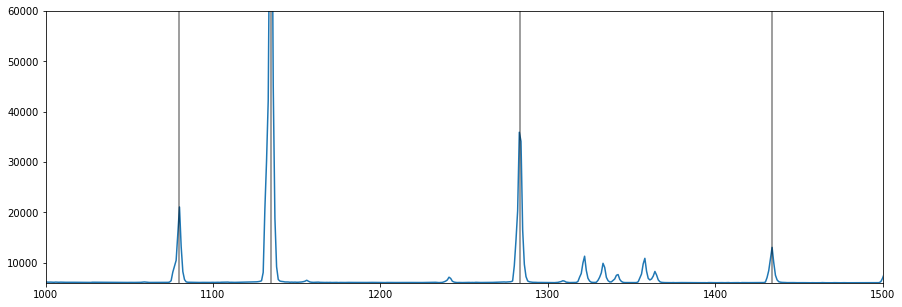

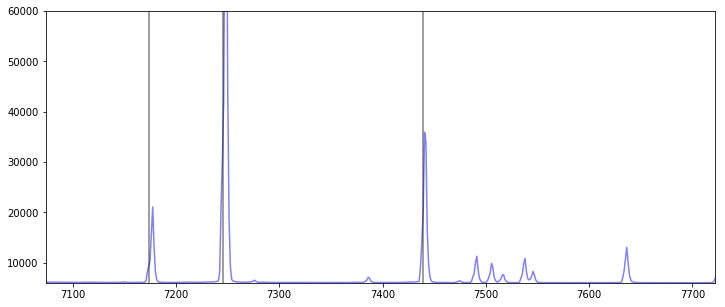

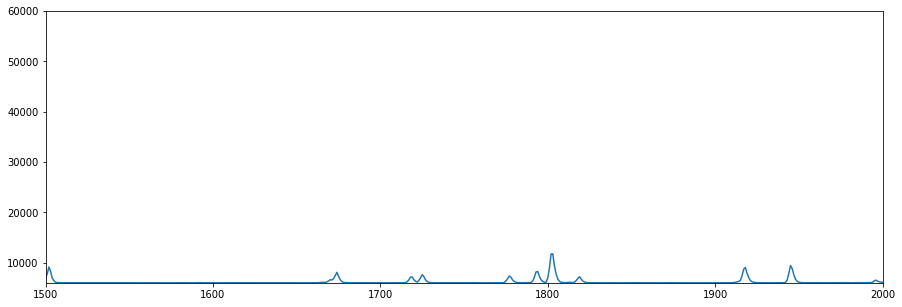

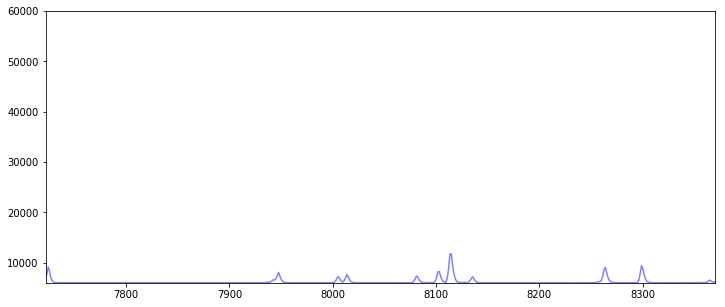

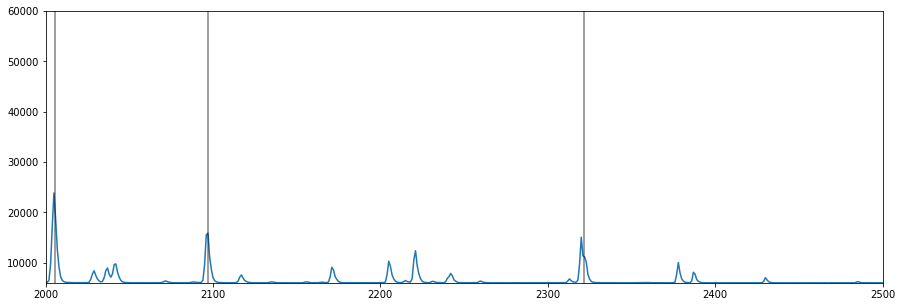

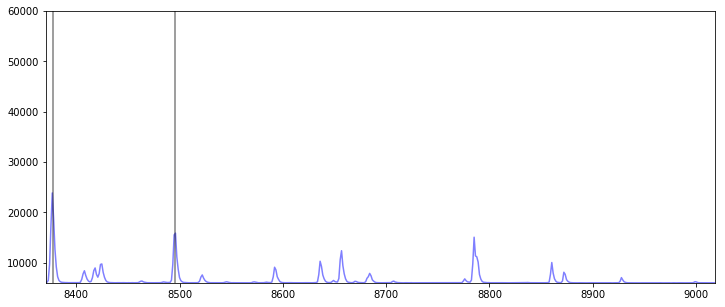

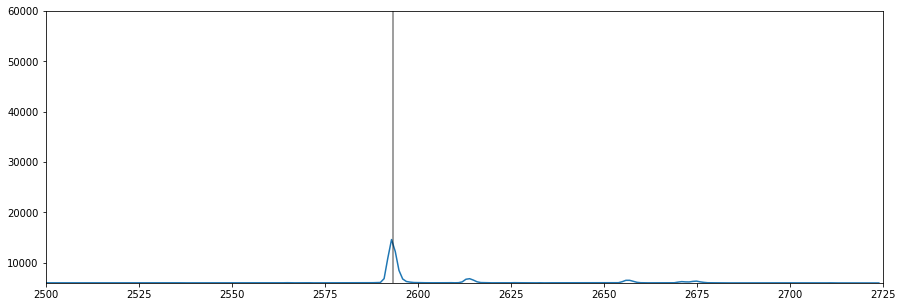

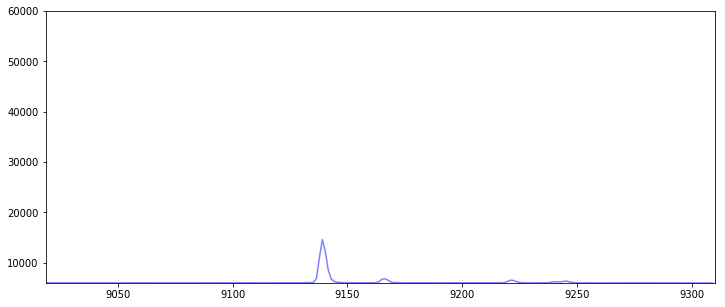

In [7]:
# DONT RUN EVAR
plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for centroid in cents:
    plt.axvline( centroid, color='k', alpha=0.5)
plt.ylim([6000, 60000])
plt.show()

wavemod = np.loadtxt('/home/ryan/projects/CHARM-KASTr/models/master_wavecal.txt')
wavecal = np.poly1d(wavemod)
pxrange = range(len(arc_slc))
    
lines = [ 5852.49, 5944.83, 6096.16, 6266.50, 6334.40, 6402.25, 6506.53, 6598.95, 6678.2, 6717.04, 6929.47, 7032.41, 7173.94, 7245.17, 7438.90, 8377.61, 8495.36]
plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in lines:
    plt.axvline( line, color='k', alpha=0.5)

plt.show()


#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for centroid in cents:
    plt.axvline( centroid, color='k', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([0, 500])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in lines:
    plt.axvline( line, color='k', alpha=0.5)

plt.xlim( [wavecal(0), wavecal(500)])
plt.show()



######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for centroid in cents:
    plt.axvline( centroid, color='k', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([500, 1000])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in lines:
    plt.axvline( line, color='k', alpha=0.5)

plt.xlim( [wavecal(500), wavecal(1000)])
plt.show()



#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for centroid in cents:
    plt.axvline( centroid, color='k', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([1000, 1500])
plt.show()


plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in lines:
    plt.axvline( line, color='k', alpha=0.5)

plt.xlim( [wavecal(1000), wavecal(1500)])
plt.show()




#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for centroid in cents:
    plt.axvline( centroid, color='k', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([1500, 2000])
plt.show()


plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in lines:
    plt.axvline( line, color='k', alpha=0.5)

plt.xlim( [wavecal(1500), wavecal(2000)])
plt.show()



#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for centroid in cents:
    plt.axvline( centroid, color='k', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([2000, 2500])
plt.show()


plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in lines:
    plt.axvline( line, color='k', alpha=0.5)

plt.xlim( [wavecal(2000), wavecal(2500)])
plt.show()


#########
plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for centroid in cents:
    plt.axvline( centroid, color='k', alpha=0.5)
plt.ylim([6000, 60000])
plt.xlim([2500, len(arc_flx)])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in lines:
    plt.axvline( line, color='k', alpha=0.5)

plt.xlim( [wavecal(2500), wavecal(len(arc_flx))])
plt.show()

[5852.49, 5944.83, 6096.16, 6266.5, 6334.4, 6402.25, 6506.53, 6598.95, 6678.2, 6717.04, 6929.47, 7032.41, 7173.94, 7245.17, 7438.9, 8377.61, 8495.36, 6965.43, 7383.98, 7635.105, 7723.76, 7948.175, 8115.31, 8424.65, 8521.44, 9122.97, 9224.5]


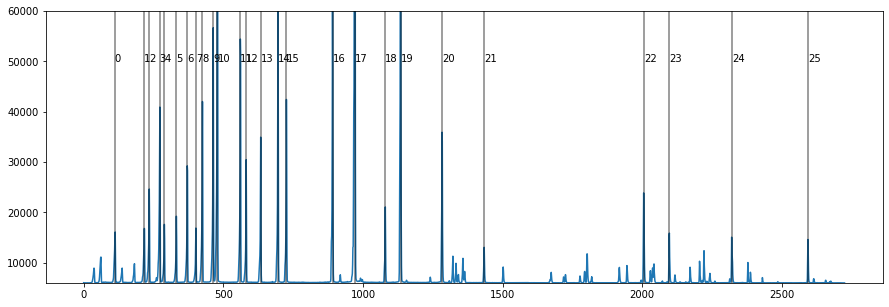

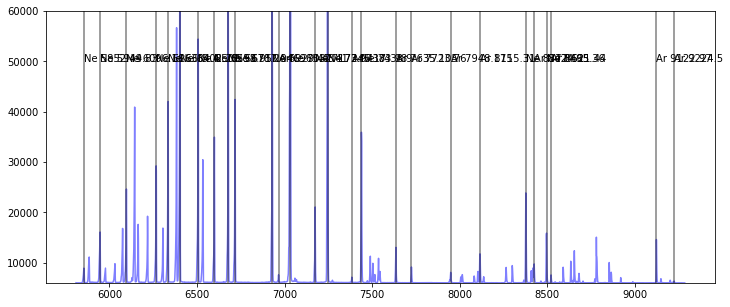

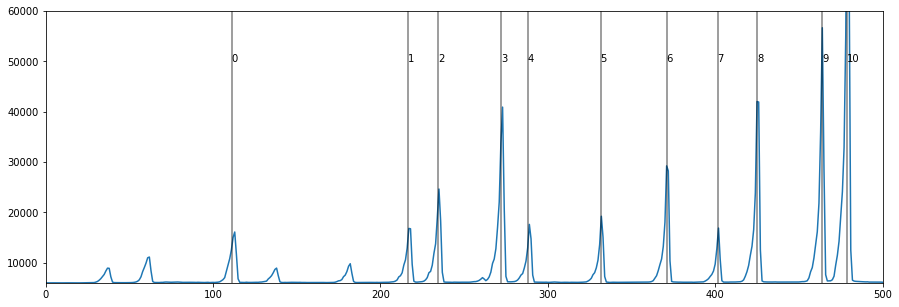

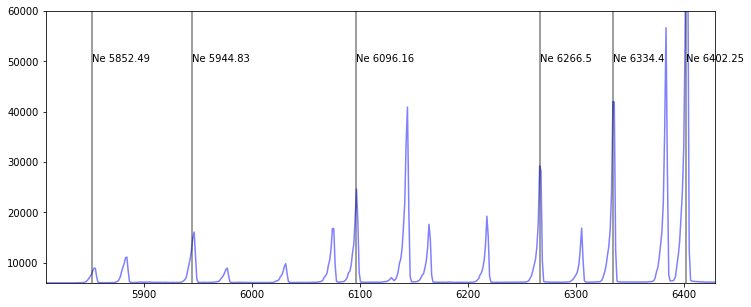

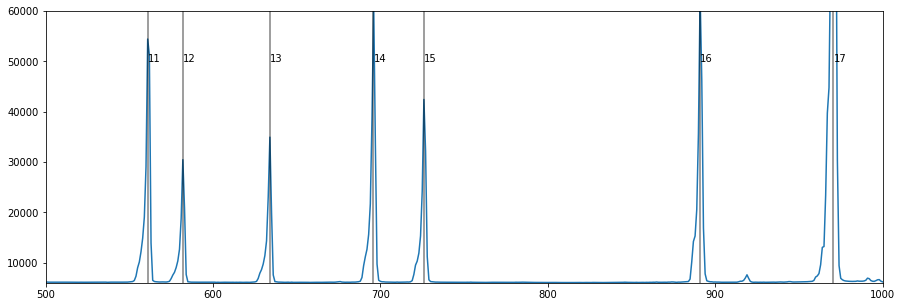

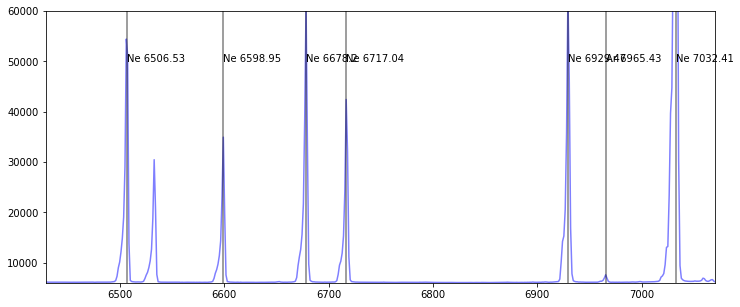

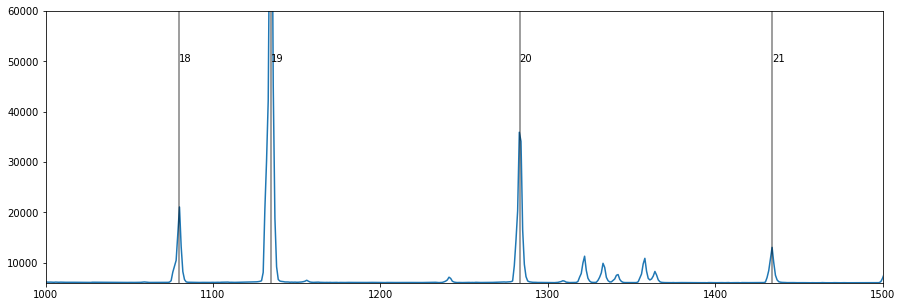

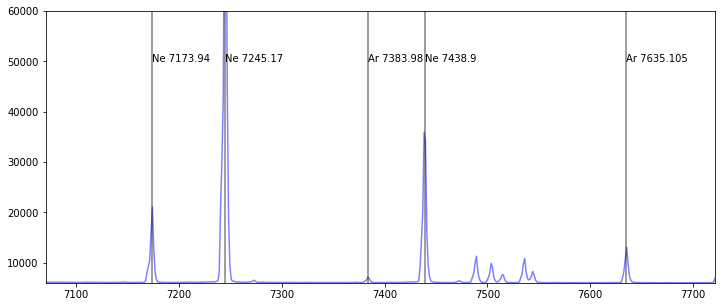

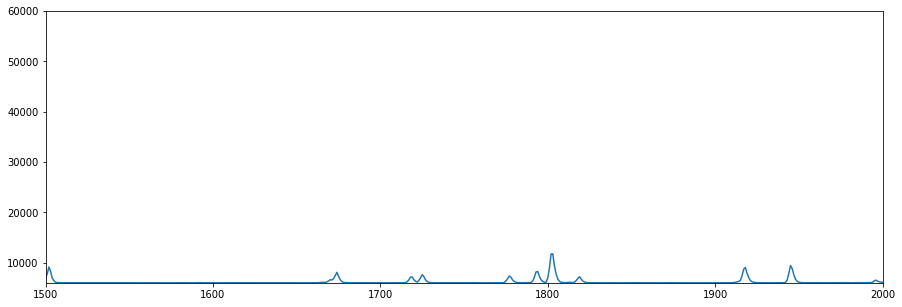

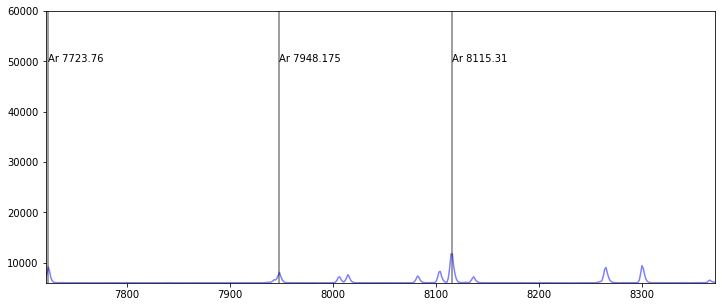

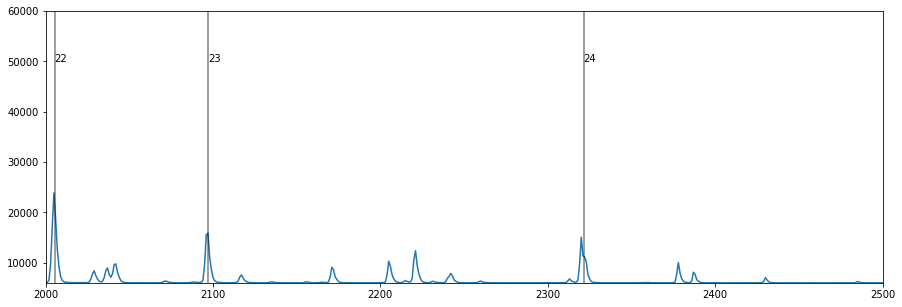

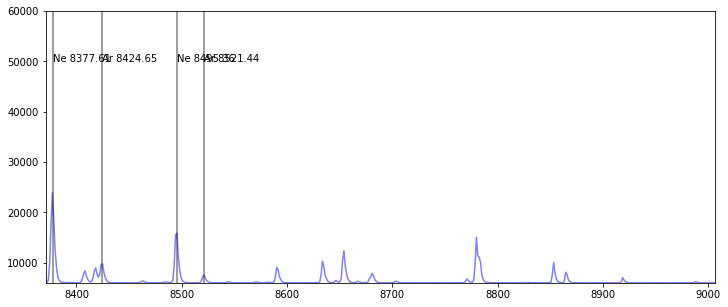

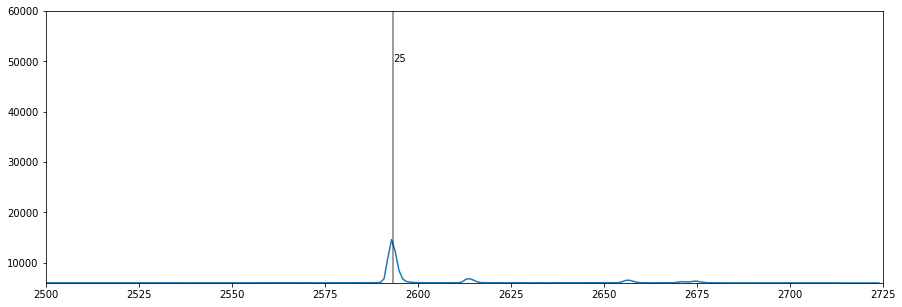

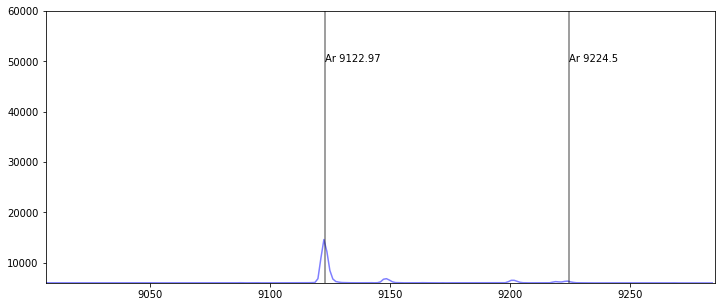

In [8]:
wavemod = np.loadtxt('/home/ryan/projects/CHARM-KASTr/models/refined_wavecal.txt')
wavecal = np.poly1d(wavemod)
pxrange = range(len(arc_slc))
    
NElines = [ 5852.49, 5944.83, 6096.16, 6266.50, 6334.40, 6402.25, 6506.53, 6598.95, 6678.2,
           6717.04, 6929.47, 7032.41, 7173.94, 7245.17, 7438.90, 8377.61, 8495.36]

ARlines = [6965.43, 7383.98, 7635.105, 7723.76, 7948.175, 8115.31, 8424.65, 8521.44, 9122.97, 9224.5]


lines = NElines + ARlines

print(lines)


plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    plt.text(line, 50000, 'Ar ' + str( line ) )

plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid < 500:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([0, 500])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(500):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(500):
        plt.text(line, 50000, 'Ar ' + str( line ) )
    
        
plt.xlim( [wavecal(0), wavecal(500)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 500 and centroid < 1000:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([500, 1000])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(1000) and line > wavecal(500):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(1000) and line > wavecal(500):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(500), wavecal(1000)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 1000 and centroid < 1500:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([1000, 1500])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(1500) and line > wavecal(1000):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(1500) and line > wavecal(1000):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(1000), wavecal(1500)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 1500 and centroid < 2000:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([1500, 2000])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(2000) and line > wavecal(1500):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(2000) and line > wavecal(1500):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(1500), wavecal(2000)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 2000 and centroid < 2500:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([2000, 2500])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(2500) and line > wavecal(2000):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(2500) and line > wavecal(2000):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(2000), wavecal(2500)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 2500 and centroid < len(arc_flx):
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([2500, len(arc_flx)])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(len(arc_flx)) and line > wavecal(2500):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(len(arc_flx)) and line > wavecal(2500):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(2500), wavecal(len(arc_flx))])
plt.show()

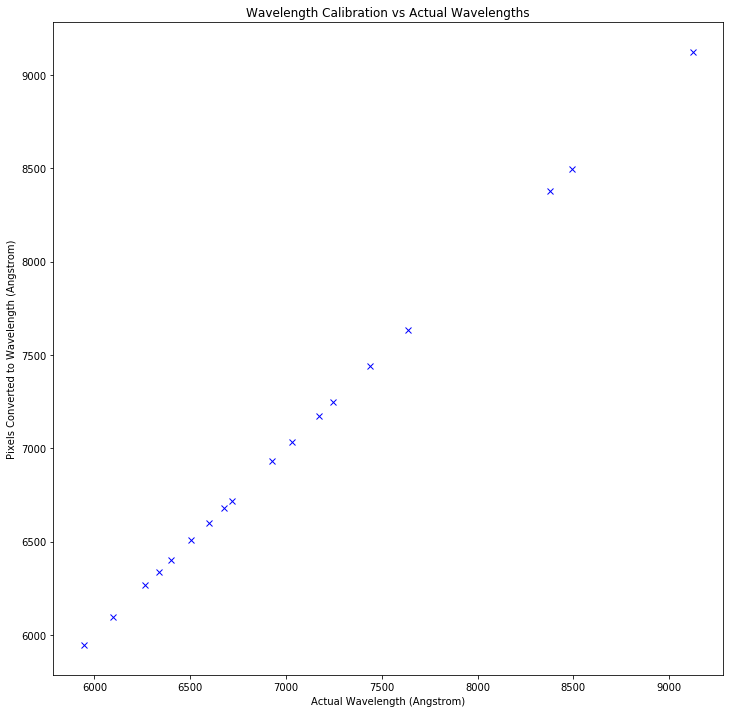

In [11]:
line = np.array([cents[0], cents[2], cents[6], cents[8],
                cents[10], cents[11], cents[13], cents[14], cents[15],
                cents[16], cents[17], cents[18], cents[19],
                cents[20], cents[22], cents[23], cents[25], cents[21]])

wv = np.array([5944.83, 6096.16, 6266.50,
              6334.40, 6402.25, 6506.53, 6598.95,
              6678.20, 6717.04, 6929.47, 7032.41,
              7173.94, 7245.17, 7438.9, 8377.61, 8495.36, 9122.97, 7635.107])

guesses = wavecal(line)

plt.figure(figsize=[12, 12])
plt.plot( wv, guesses,  'bx')

plt.xlabel('Actual Wavelength (Angstrom)')
plt.ylabel('Pixels Converted to Wavelength (Angstrom)')

plt.title('Wavelength Calibration vs Actual Wavelengths')

'''
plt.savefig('Calibration vs Actual.png')
'''

plt.show()

[ 111.27130536  234.50266333  371.04534491  425.07334906  478.8981438
  561.07057933  633.8312751   695.82594958  725.9971427   891.01805113
  970.61562411 1079.8950196  1134.54488699 1283.14822301 2005.38146674
 2096.93824078 2593.41595985 1433.95048354]
[5944.83 6096.16 6266.5  6334.4  6402.25 6506.53 6598.95 6678.2  6717.04
 6929.47 7032.41 7173.94 7245.17 7438.9  8377.61 8495.36 9122.97 7635.11]


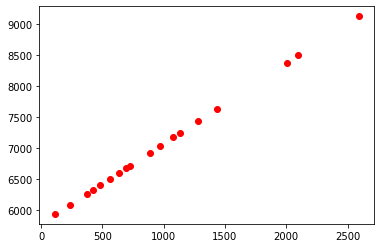

In [12]:
good_cents =[cents[0], cents[2], cents[6], cents[8],
                cents[10], cents[11], cents[13], cents[14], cents[15],
                cents[16], cents[17], cents[18], cents[19],
                cents[20], cents[22], cents[23], cents[25], cents[21]]

min_acc = 75

wavemod = np.loadtxt('/home/ryan/projects/CHARM-KASTr/models/refined_wavecal.txt')
wavecal = np.poly1d(wavemod)
pxrange = range(len(arc_slc))
    
lines = np.array([5944.83, 6096.16, 6266.50,
              6334.40, 6402.25, 6506.53, 6598.95,
              6678.20, 6717.04, 6929.47, 7032.41,
              7173.94, 7245.17, 7438.9, 8377.61, 8495.36, 9122.97, 7635.11])


px_pos = np.array(good_cents)

wave_guess = wavecal( px_pos )

wave_ref = np.zeros(len(px_pos))

for i, guess in enumerate(wave_guess):
    
    dev = np.abs( guess - lines )
    
    min_dev = np.min(dev)
    
    if np.abs(min_dev) > min_acc:
        continue
        
    wave_ref[i] = lines[ dev == min_dev ]
    
    
px_pos = px_pos[ wave_ref != 0 ]


print(px_pos)

wave_ref = wave_ref[ wave_ref != 0 ]


print(wave_ref)

plt.plot( px_pos, wave_ref, 'ro')
plt.show()

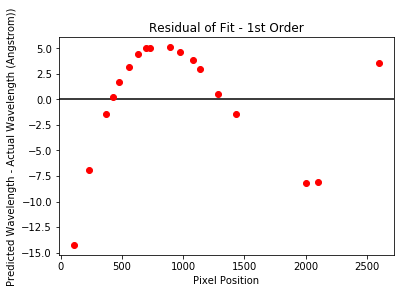

linear error:  30.868008975993817


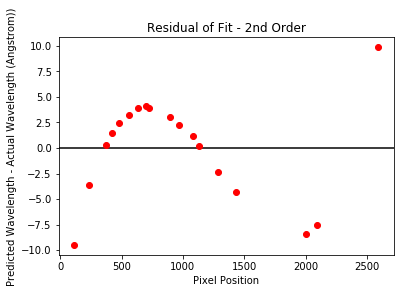

Quadratic error:  24.061320907873707


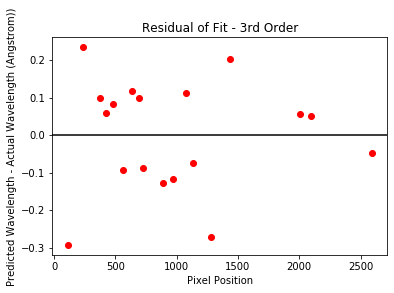

Cubic error:  0.020623137249620963


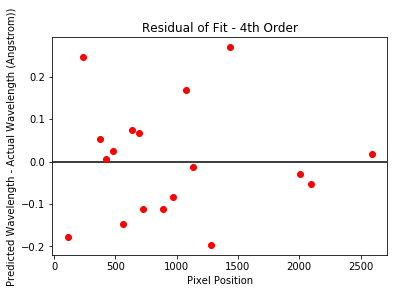

Quartic error:  0.016846607444476205


In [15]:
ref_wavemod = np.polyfit(px_pos, wave_ref, 1)

#np.savetxt('/home/ryan/projects/CHARM-KASTr/models/refined_wavecal.txt', ref_wavemod)

ref_wavecal = np.poly1d(ref_wavemod)

deltas = ref_wavecal(px_pos) - wave_ref

plt.axhline(color='k')
plt.plot( px_pos, deltas, 'ro')

plt.title('Residual of Fit - 1st Order')

plt.ylabel( "Predicted Wavelength - Actual Wavelength (Angstrom))" )
plt.xlabel("Pixel Position")

'''
plt.savefig('LinearWavecal.png')
'''

plt.show()

meansquareerror = np.sum( np.power((ref_wavecal(px_pos) - wave_ref), 2) )/ len(wave_ref)

print("linear error: ", meansquareerror)

ref_wavemod = np.polyfit(px_pos, wave_ref, 2)

#np.savetxt('/home/ryan/projects/CHARM-KASTr/models/refined_wavecal.txt', ref_wavemod)

ref_wavecal = np.poly1d(ref_wavemod)
deltas = ref_wavecal(px_pos) - wave_ref

plt.axhline(color='k')
plt.plot( px_pos, deltas, 'ro')

plt.title('Residual of Fit - 2nd Order')

plt.ylabel( "Predicted Wavelength - Actual Wavelength (Angstrom))" )
plt.xlabel("Pixel Position")

'''
plt.savefig('QuadraticWavecal.png')
'''

plt.show()

meansquareerror = np.sum( np.power((ref_wavecal(px_pos) - wave_ref), 2) )/ len(wave_ref)

print("Quadratic error: ", meansquareerror)

ref_wavemod = np.polyfit(px_pos, wave_ref, 3)

#np.savetxt('/home/ryan/projects/CHARM-KASTr/models/refined_wavecal.txt', ref_wavemod)

ref_wavecal = np.poly1d(ref_wavemod)
deltas = ref_wavecal(px_pos) - wave_ref

plt.axhline(color='k')
plt.plot( px_pos, deltas, 'ro')

plt.title('Residual of Fit - 3rd Order')

plt.ylabel( "Predicted Wavelength - Actual Wavelength (Angstrom))" )
plt.xlabel("Pixel Position")

'''
plt.savefig('CubicWavecal.png')
'''

plt.show()

meansquareerror = np.sum( np.power((ref_wavecal(px_pos) - wave_ref), 2) )/ len(wave_ref)

print("Cubic error: ", meansquareerror)

ref_wavemod = np.polyfit(px_pos, wave_ref, 4)

np.savetxt('/home/ryan/projects/CHARM-KASTr/models/refined_wavecal.txt', ref_wavemod)

ref_wavecal = np.poly1d(ref_wavemod)

deltas = ref_wavecal(px_pos) - wave_ref

plt.axhline(color='k')
plt.plot( px_pos, deltas, 'ro')

plt.title('Residual of Fit - 4th Order')

plt.ylabel( "Predicted Wavelength - Actual Wavelength (Angstrom))" )
plt.xlabel("Pixel Position")


plt.savefig('QuarticWavecal.png')


plt.show()

meansquareerror = np.sum( np.power((ref_wavecal(px_pos) - wave_ref), 2) )/ len(wave_ref)

print("Quartic error: ", meansquareerror)



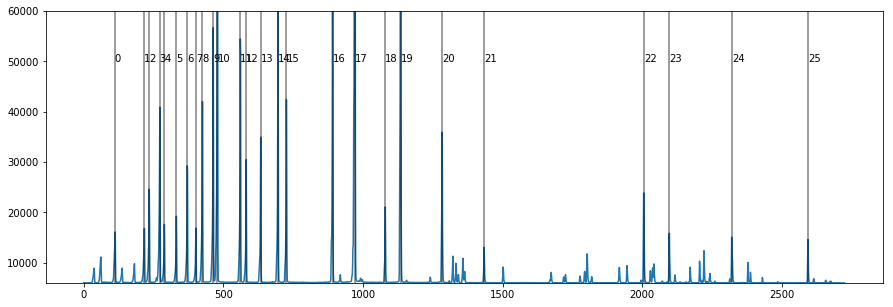

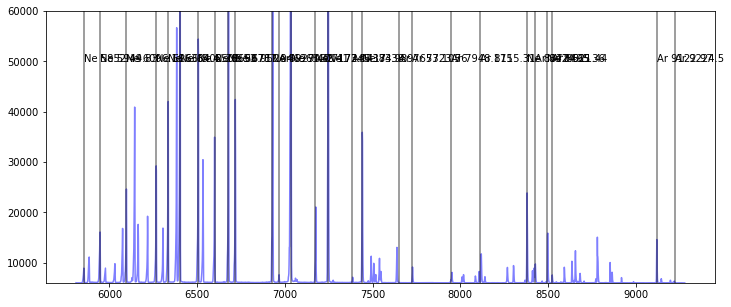

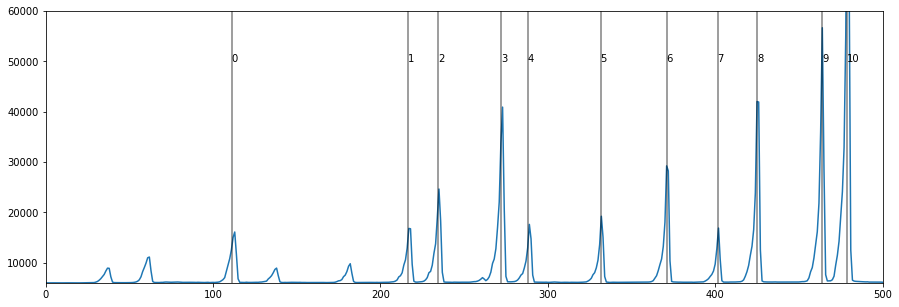

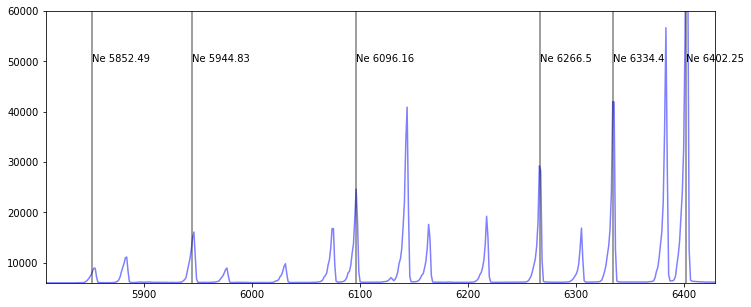

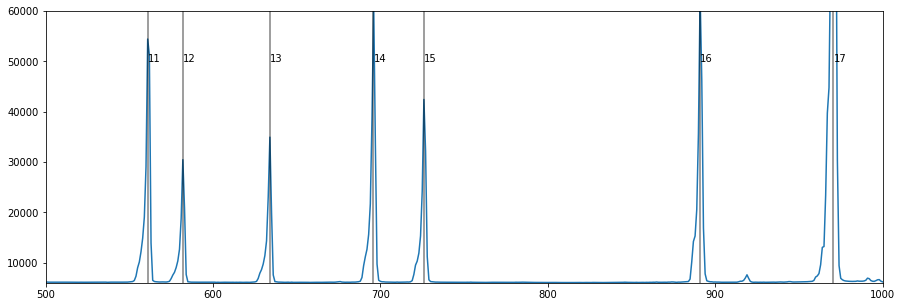

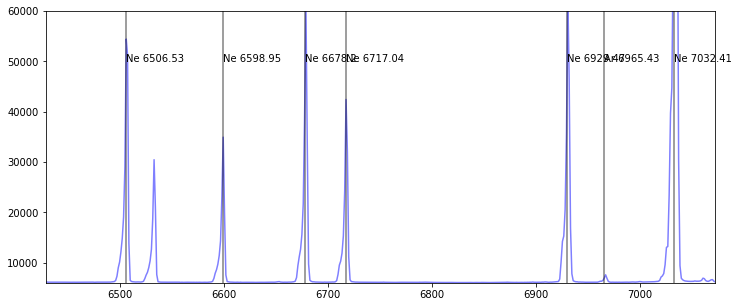

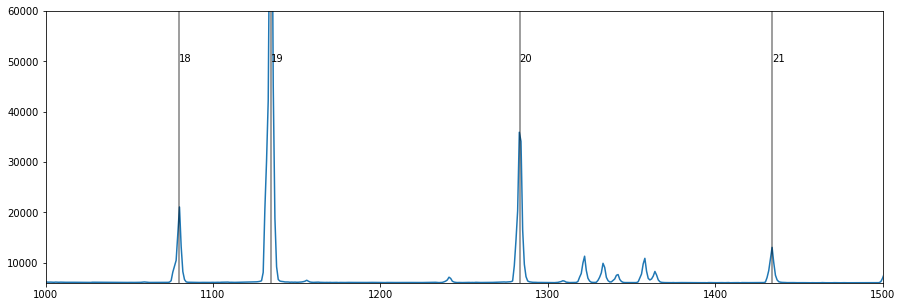

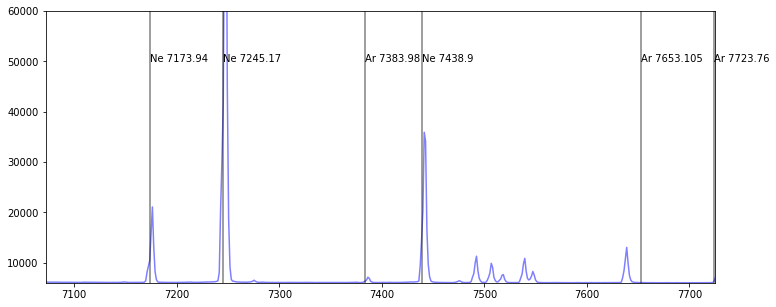

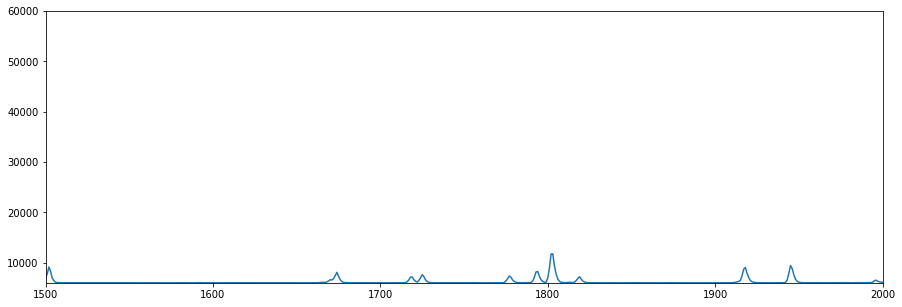

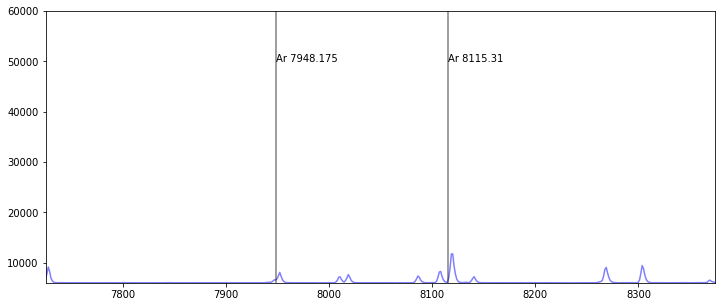

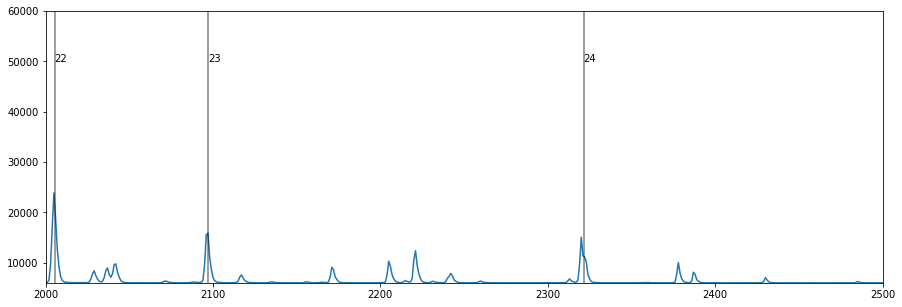

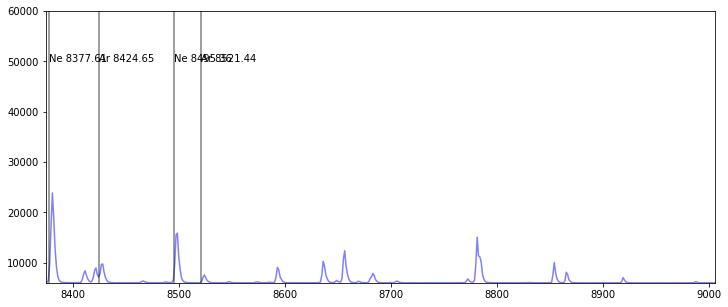

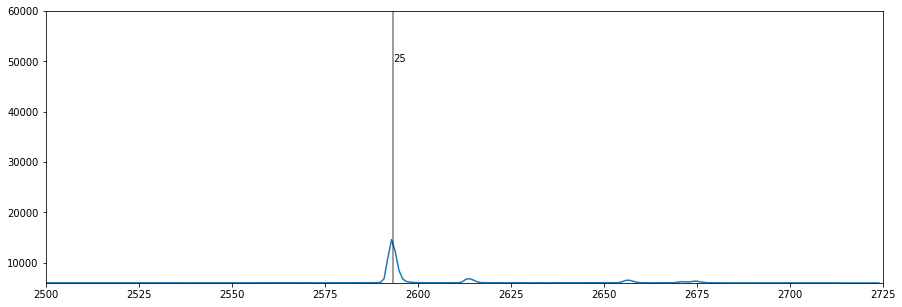

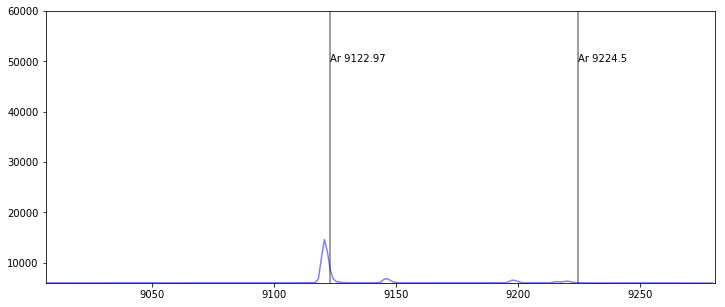

In [51]:
wavecal = ref_wavecal
pxrange = range(len(arc_slc))


plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    plt.text(line, 50000, 'Ar ' + str( line ) )

plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid < 500:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([0, 500])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(500):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(500):
        plt.text(line, 50000, 'Ar ' + str( line ) )
    
        
plt.xlim( [wavecal(0), wavecal(500)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 500 and centroid < 1000:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([500, 1000])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(1000) and line > wavecal(500):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(1000) and line > wavecal(500):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(500), wavecal(1000)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 1000 and centroid < 1500:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([1000, 1500])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(1500) and line > wavecal(1000):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(1500) and line > wavecal(1000):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(1000), wavecal(1500)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 1500 and centroid < 2000:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([1500, 2000])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(2000) and line > wavecal(1500):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(2000) and line > wavecal(1500):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(1500), wavecal(2000)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 2000 and centroid < 2500:
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([2000, 2500])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(2500) and line > wavecal(2000):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(2500) and line > wavecal(2000):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(2000), wavecal(2500)])
plt.show()

#######

plt.figure( figsize=[15, 5])
plt.plot(arc_flx)
for i, centroid in enumerate(cents):
    plt.axvline( centroid, color='k', alpha=0.5)
    
    if centroid > 2500 and centroid < len(arc_flx):
        plt.text(centroid, 50000, str(i))
plt.ylim([6000, 60000])
plt.xlim([2500, len(arc_flx)])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_flx, color='b', alpha=0.5)
plt.ylim([6000, 60000])

for line in NElines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(len(arc_flx)) and line > wavecal(2500):
        plt.text(line, 50000, 'Ne ' + str( line ) )
    
for line in ARlines:
    plt.axvline( line, color='k', alpha=0.5)
    if line < wavecal(len(arc_flx)) and line > wavecal(2500):
        plt.text(line, 50000, 'Ar ' + str( line ) )

plt.xlim( [wavecal(2500), wavecal(len(arc_flx))])
plt.show()

Reduction Ho!
Loaded image
Subtracted Bias
Calculated Variance
Flat Field Corrected the image
Flat Field Corrected the variance
Masked the image
Masked the variance
Created the slit trace
Generated Centered Image Slices
Generated Centered Variance SLices
Created spatial profile


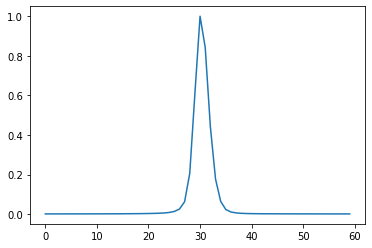

Reduction Continue!
Subtracted the background from image
Subtracted the background from variance
Generated the spectral weighting function
Extracted the spectrum
Extracted the variance


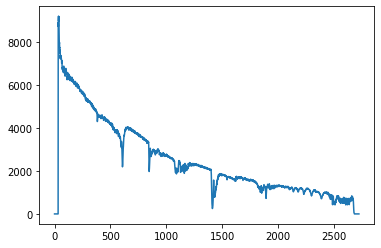

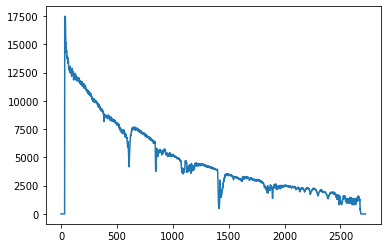

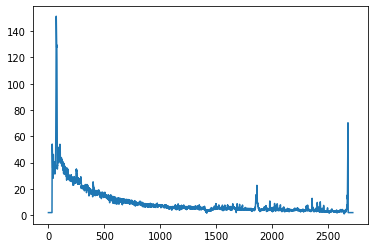

In [4]:
stdpath = '/home/ryan/projects/KASTr_data/raw/1April2019/red/telluric/r1081.fits'

stdim = fits.open(stdpath)

std_slcs, std_varslcs, stdpmod, std_prof = reduce_standard_first_stage(stdim, median_biasframe, norm_flat, image_mask, 30)

plt.plot(std_prof)
plt.show()

stdspec, stdvar, std_bspec = reduce_second_stage(std_slcs, std_varslcs, std_prof, 0.1)

plt.plot(stdspec)
plt.show()

plt.plot(stdvar)
plt.show()

plt.plot(std_bspec)
plt.show()

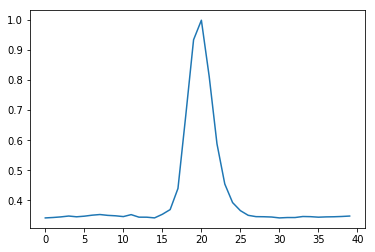

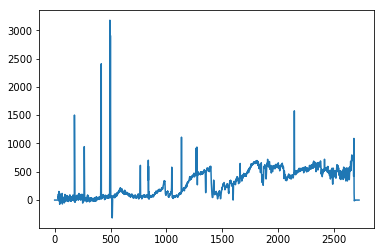

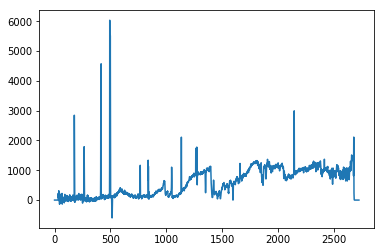

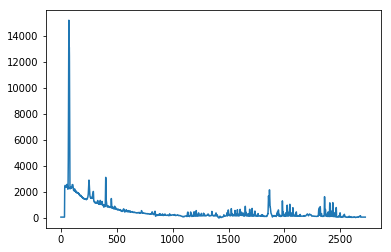

In [5]:
scipath = '/home/ryan/projects/KASTr_data/raw/1April2019/red/science/r1078.fits'

sciim = fits.open(scipath)

sci_slcs, scivar_slcs, sci_prof = reduce_science_first_stage(sciim, median_biasframe, norm_flat, image_mask, 20, stdpfit, stdpmod)

plt.plot(sci_prof)
plt.show()

scispect, scivar, sci_bkg = reduce_second_stage(sci_slcs, scivar_slcs, sci_prof, 0.4)

plt.plot(scispect)
plt.show()

plt.plot(scivar)
plt.show()

plt.plot(sci_bkg)
plt.show()

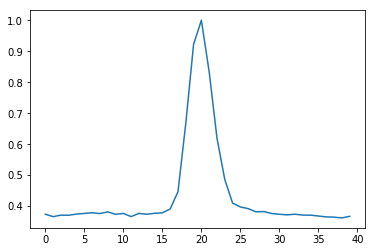

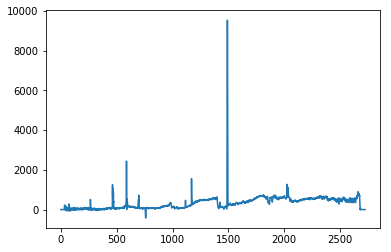

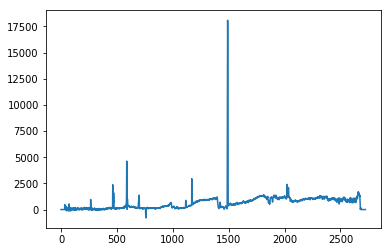

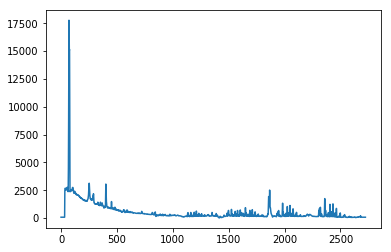

In [6]:
scipath2 = '/home/ryan/projects/KASTr_data/raw/1April2019/red/science/r1079.fits'

sciim2 = fits.open(scipath2)

sci_slcs2, scivar_slcs2, sci_prof2 = reduce_science_first_stage(sciim2, median_biasframe, norm_flat, image_mask, 20, stdpfit, stdpmod)

plt.plot(sci_prof2)
plt.show()

scispect2, scivar2, sci_bkg2 = reduce_second_stage(sci_slcs2, scivar_slcs2, sci_prof2, 0.5)

plt.plot(scispect2)
plt.show()

plt.plot(scivar2)
plt.show()

plt.plot(sci_bkg2)
plt.show()

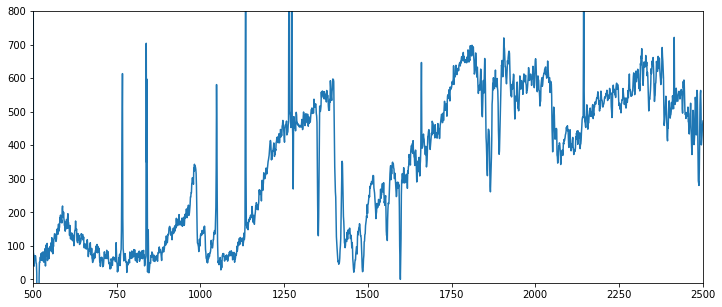

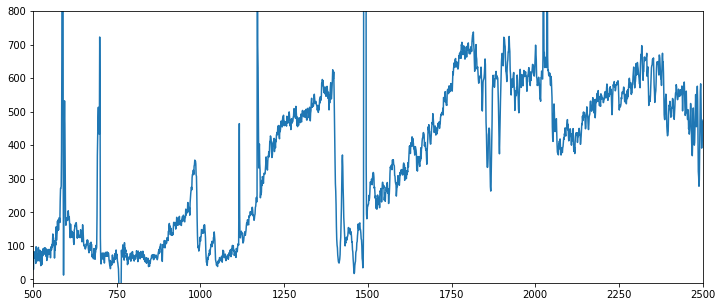

In [7]:
plt.figure(figsize=[12,5])
plt.plot(scispect)
plt.xlim([500,2500])
plt.ylim([-10,800])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(scispect2)
plt.xlim([500,2500])
plt.ylim([-10,800])
plt.show()

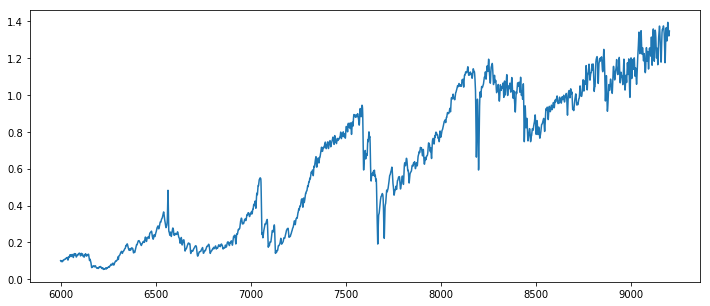

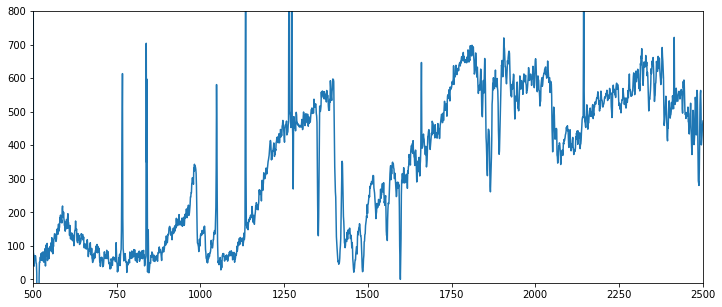

In [8]:
Dstandard = np.loadtxt('/home/ryan/projects/KASTr_data/DStandards/stds/M6_all.txt')
plt.figure(figsize=[12,5])
plt.plot(Dstandard[:, 0], Dstandard[:, 1])
plt.show()

plt.figure(figsize=[12,5])
plt.plot(scispect)
plt.xlim([500,2500])
plt.ylim([-10,800])
plt.show()

In [9]:
wavelengths = Dstandard[:, 0]
fluxes = Dstandard[:, 1]

print( np.argmax(fluxes[4500:5500]) )

stdpeak1_ix = 4500 + 912

print(np.argmax(scispect[550:600]))

objpeak1_px = 550 + 38

print(np.where(wavelengths == 7000))

print(np.argmax(fluxes[9800:11000]))

stdpeak2_ix = 690 + 9800

print(np.argmax(scispect[900:1000]))

objpeak2_px = 82 + 900

print(np.where(wavelengths == 7500))

print(np.argmax(fluxes[14000:16000]))

stdpeak3_ix = 14000 + 1842

print(np.argmax(scispect[1300:1400]))

objpeak3_px = 1300 + 95

print(np.where(wavelengths == 8100))

#plt.plot(wavelengths[20000:25000], fluxes[20000:25000])
#plt.show()

print(np.argmax(fluxes[20000:25000]))

stdpeak4_ix = 2497 + 20000

#plt.plot(scispect[1700:2000])
#plt.show()

print(np.argmax(scispect[1700:2000]))

objpeak4_px = 206 + 1700

STDP = [wavelengths[stdpeak1_ix], wavelengths[stdpeak2_ix], wavelengths[stdpeak3_ix], wavelengths[stdpeak4_ix]]

OBJP = [objpeak1_px, objpeak2_px, objpeak3_px, objpeak4_px]

wavemodel = np.polyfit(OBJP, STDP, 1)

wavecal = np.poly1d(wavemodel)

912
38
(array([9999]),)
690
82
(array([14999]),)
1842
95
(array([20999]),)
2497
206


In [18]:
import pandas as pd

wcalex = pd.DataFrame(wavemodel)

wcalex.to_csv('master_wavecal.txt', index=False, header=False)

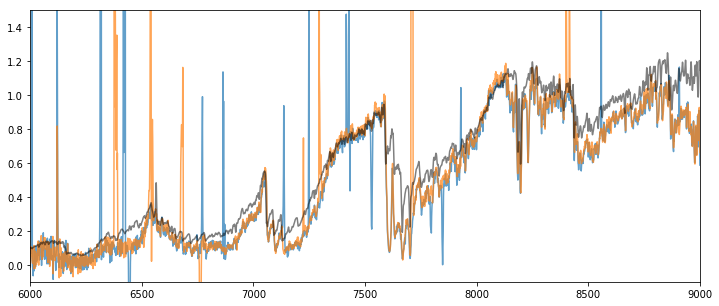

In [22]:
nwavemod = np.loadtxt('/home/ryan/projects/CHARM-KASTr/models/master_wavecal.txt')

nwavecal = np.poly1d(nwavemod)

pxrange = range(len(scispect))

n_spec = scispect / (scispect[objpeak4_px] - 100)

n_spec2 = scispect2 / (scispect2[objpeak4_px] - 100)

plt.figure(figsize=[12,5])
plt.plot(nwavecal(pxrange), n_spec, alpha = 0.7)
plt.plot(nwavecal(pxrange), n_spec2, alpha = 0.7)
plt.xlim([6000, 9000])
plt.ylim([-0.1, 1.5])

plt.plot(wavelengths, fluxes, color = 'k', alpha=0.5)
plt.xlim([6000, 9000])
plt.show()

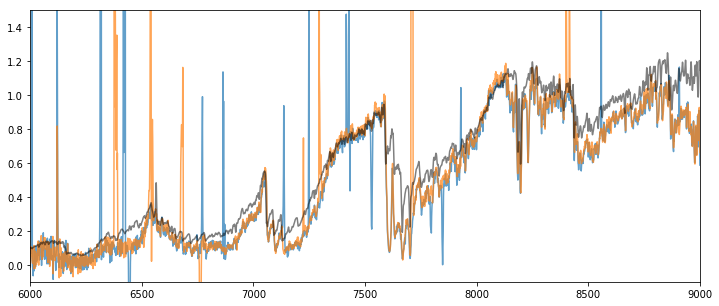

In [10]:
pxrange = range(len(scispect))

n_spec = scispect / (scispect[objpeak4_px] - 100)

n_spec2 = scispect2 / (scispect2[objpeak4_px] - 100)


plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), n_spec, alpha = 0.7)
plt.plot(wavecal(pxrange), n_spec2, alpha = 0.7)
plt.xlim([6000, 9000])
plt.ylim([-0.1, 1.5])

plt.plot(wavelengths, fluxes, color = 'k', alpha=0.5)
plt.xlim([6000, 9000])
plt.show()

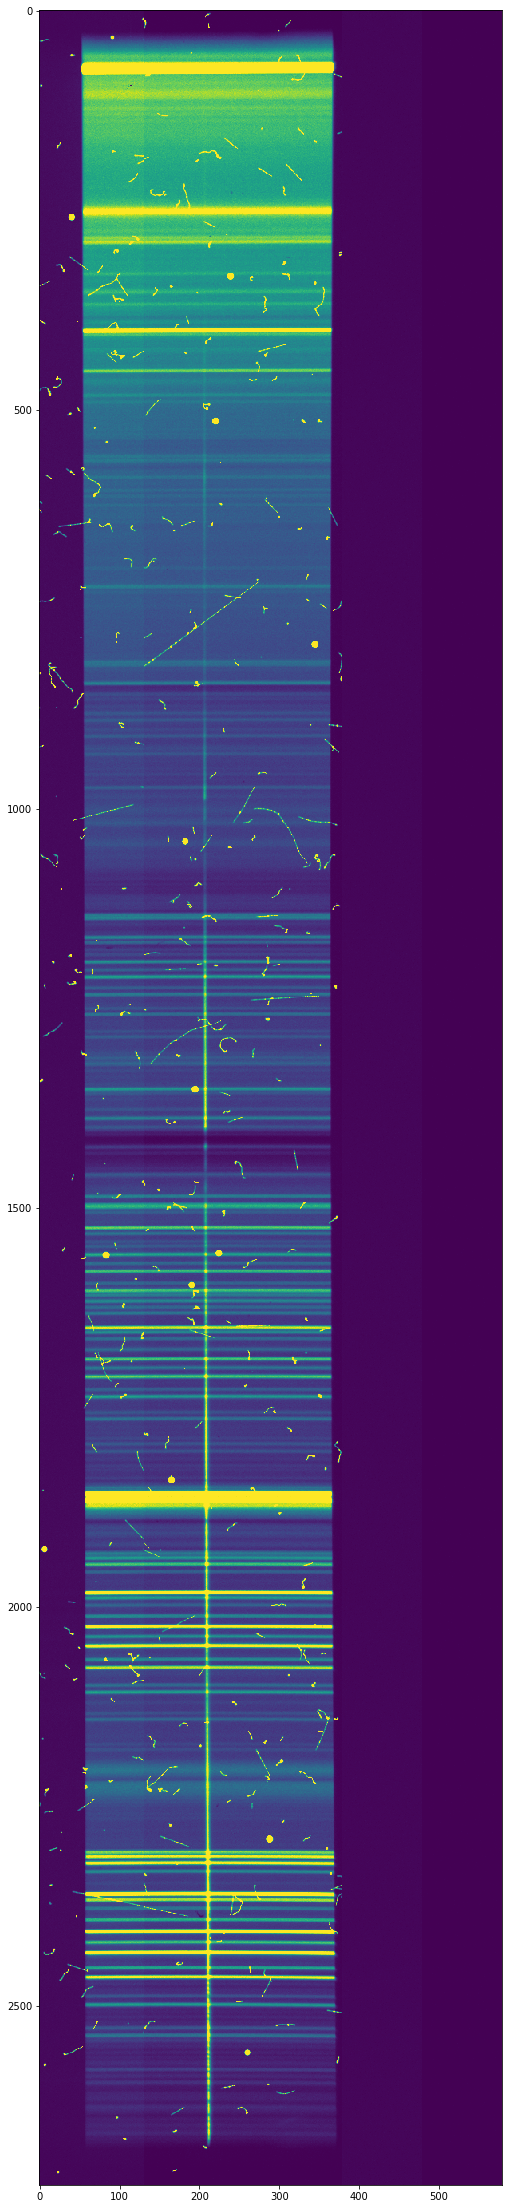

In [20]:
plt.figure(figsize=[10,40])
plt.imshow(fits.open(scipath)[0].data,vmin=1000,vmax=2000)

In [ ]:
arcp = '/home/ryan/projects/KASTr_data/raw/data-2019-03-31-shane-Adam.Burgasser/red/1077/arc/r1001.fits'

arcd = copy.deepcopy(fits.open(arcp)[0].data)

pfit = np.poly1d(stdpmod)

arc_slc = []

for i in range(len(arcd[:,0])):
    slc = arcd[i,:]
    arc_slc.append(slc[ int(np.around(pfit(i) - 3)):int(np.around(pfit(i) + 3))])

plt.figure(figsize=[12,5])
plt.plot(np.sum(arc_slc, axis=1))
plt.xlim([0, 1600])
plt.ylim([6000, 100000])
plt.xlabel('Pixel')
plt.ylabel('Flux (DN)')
plt.title('Arc Lamps (Spare_Ar, Dim_Ne, Hg-A,Neon) 0-1600 px')

'''
plt.savefig('Arc_Lamp_spec_0-1600.png', type='png')

'''

plt.show()

wavemod = np.loadtxt('/home/ryan/projects/CHARM-KASTr/models/master_wavecal.txt')
wavecal = np.poly1d(wavemod)
pxrange = range(len(arc_slc))
    
plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_slc)
plt.xlabel('Wavelength (Angstrom)')
plt.xlim([wavecal(0), wavecal(1600)])
plt.ylim([1000, 15000])
plt.ylabel('Flux (DN)')
plt.title('Arc Lamps (Spare_Ar, Dim_Ne, Hg-A,Neon) 0-1600 px using Estimated Wavecal')

'''
plt.savefig('Arc_Lamp_spec_0-1600_wavecaled.png', type='png')
'''

plt.show()

arcp = '/home/ryan/projects/KASTr_data/raw/data-2019-03-31-shane-Adam.Burgasser/red/1077/arc/r1002.fits'

arcd = copy.deepcopy(fits.open(arcp)[0].data)

pfit = np.poly1d(stdpmod)

arc_slc = []

for i in range(len(arcd[:,0])):
    slc = arcd[i,:]
    arc_slc.append(slc[ int(np.around(pfit(i) - 3)):int(np.around(pfit(i) + 3))])

plt.figure(figsize=[12,5])
plt.plot(np.sum(arc_slc, axis=1))
plt.xlim([1600, len(arc_slc)])
plt.xlabel('Pixel')
plt.ylabel('Flux (DN)')
plt.ylim([6000, 170000])
plt.title('Arc Lamps (Spare_Ar, Dim_Ne, Hg-A,Neon) 1600-2725 px')

'''
plt.savefig('Arc_Lamp_spec_1600-2725.png', type='png')
'''

plt.show()

wavemod = np.loadtxt('/home/ryan/projects/CHARM-KASTr/models/master_wavecal.txt')
wavecal = np.poly1d(wavemod)
pxrange = range(len(arc_slc))
    
plt.figure(figsize=[12,5])
plt.plot(wavecal(pxrange), arc_slc)
plt.xlabel('Wavelength (Angstrom)')
plt.xlim([wavecal(1600), wavecal(len(arc_slc))])
plt.ylabel('Flux (DN)')
plt.ylim([1000, 30000])
plt.title('Arc Lamps (Spare_Ar, Dim_Ne, Hg-A,Neon) 1600-2725 px using Estimated Wavecal')

'''
plt.savefig('Arc_Lamp_spec_1600-2725_wavecaled.png', type='png')
'''

plt.show()

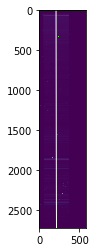

In [11]:
sci_im = copy.deepcopy(fits.open(scipath)[0].data)
xrange = range(len(sci_im[:,0]))
fig, ax = plt.subplots()
ax.imshow(sci_im)
ax.plot(stdpfit(xrange), xrange, color = 'w', linewidth=1)

In [7]:
def reduce_science_first_stage(image_path, bias_frame, normalized_flat, mask, px_thresh, poly_slit_trace, poly_slit_model):
    
    image_file = fits.open(image_path)
    
    image_data = copy.deepcopy(image_file[0].data)
    
    bias_subtracted_image = bias_subtract(image_data, bias_frame)
    
    image_variance = variance_image(bias_subtracted_image)
    
    normalized_image = flat_normalize_image(bias_subtracted_image, normalized_flat, mask)
    
    normalized_variance = flat_normalize_image(image_variance, normalized_flat, mask)
    
    masked_image = mask_image(normalized_image, mask)
    
    masked_variance = mask_image(normalized_variance, mask)
    
    image_slices = gen_cent_slc(masked_image, poly_slit_trace, px_thresh)
    
    poly_shift = slit_fit_shift(image_slices, poly_slit_model, px_thresh)
    
    shifted_poly = slit_fit_trace(poly_shift)
    
    centered_slices = gen_cent_slc(masked_image, shifted_poly, px_thresh)
    
    variance_slices = gen_cent_slc(masked_variance, shifted_poly, px_thresh)
    
    spatial_profile = create_norm_spatial_profile(centered_slices)
    
    return centered_slices, variance_slices, spatial_profile

In [5]:
def reduce_second_stage(image_slices, variance_slices, spatial_profile, bkg_percent_thresh):
    
    bsubtracted_image_slices, background_spec = background_subtract(image_slices, spatial_profile, bkg_percent_thresh)
    
    bsubtracted_variance_slices, vbackground_spec = background_subtract(variance_slices, spatial_profile, bkg_percent_thresh)
    
    extraction_weight = weight_function(bsubtracted_image_slices)
    
    spect = extract_spectrum(bsubtracted_image_slices, extraction_weight)
    
    variance = extract_variance(bsubtracted_variance_slices, extraction_weight)
    
    return spect, variance, background_spec

In [4]:
def reduce_standard_first_stage(image_path, bias_frame, normalized_flat, mask, px_thresh):
    
    image_file = fits.open(image_path)
    
    image_data = copy.deepcopy(image_file[0].data)
    
    bias_subtracted_image = bias_subtract(image_data, bias_frame)
    
    image_variance = variance_image(bias_subtracted_image)
    
    normalized_image = flat_normalize_image(bias_subtracted_image, normalized_flat, mask)
    
    normalized_variance = flat_normalize_image(image_variance, normalized_flat, mask)
    
    masked_image = mask_image(normalized_image, mask)
    
    masked_variance = mask_image(normalized_variance, mask)
    
    poly_slit_model = slit_fit_model(masked_image)
    
    poly_slit_trace = slit_fit_trace(poly_slit_model)
    
    image_slices = gen_cent_slc(masked_image, poly_slit_trace, px_thresh)
    
    variance_slices = gen_cent_slc(masked_variance, poly_slit_trace, px_thresh)
    
    spatial_profile = create_norm_spatial_profile(image_slices)
    
    return image_slices, variance_slices, poly_slit_model, poly_slit_trace, spatial_profile
    

In [7]:
def reduce_science(image_path, bias_frame, normalized_flat, mask, px_thresh, poly_slit_trace, poly_slit_model, bkg_percent_thresh):
    
    image_file = fits.open(image_path)
    
    image_data = copy.deepcopy(image_file[0].data)
    
    bias_subtracted_image = bias_subtract(image_data, bias_frame)
    
    image_variance = variance_image(bias_subtracted_image)
    
    normalized_image = flat_normalize_image(bias_subtracted_image, normalized_flat, mask)
    
    normalized_variance = flat_normalize_image(image_variance, normalized_flat, mask)
    
    masked_image = mask_image(normalized_image, mask)
    
    masked_variance = mask_image(normalized_variance, mask)
    
    image_slices = gen_cent_slc(masked_image, poly_slit_trace, px_thresh)
    
    poly_shift = slit_fit_shift(image_slices, poly_slit_model, px_thresh)
    
    shifted_poly = np.poly1d(poly_shift)
    
    centered_slices = gen_cent_slc(masked_image, shifted_poly, px_thresh)
    
    variance_slices = gen_cent_slc(masked_variance, shifted_poly, px_thresh)
    
    spatial_profile = create_norm_spatial_profile(centered_slices)
    
    bsubtracted_image_slices, background_spec = background_subtract(image_slices, spatial_profile, bkg_percent_thresh)
    
    bsubtracted_variance_slices, vbackground_spec = background_subtract(variance_slices, spatial_profile, bkg_percent_thresh)
    
    extraction_weight = weight_function(bsubtracted_image_slices)
    
    spect = extract_spectrum(bsubtracted_image_slices, extraction_weight)
    
    variance = extract_variance(bsubtracted_variance_slices, extraction_weight)
    
    return spect, variance, image_slices, spatial_profile, background_spec

In [9]:
#only works for 4th order, will tweak later
def slit_fit_shift(cent_slices, slit_fit_model, px_thresh):
    signal_center = np.argmax(np.median(cent_slices, axis=0))
    
    offset = signal_center - px_thresh
    
    shifted_model = copy.deepcopy(slit_fit_model)
    
    shifted_model[4] = shifted_model[4] + offset
    
    return shifted_model

In [4]:
def create_norm_spatial_profile(cent_slcs):
    prof_slcs = copy.deepcopy(cent_slcs)
    for i in range(len(prof_slcs)):
        prof_slcs[i] = prof_slcs[i] / np.amax(prof_slcs[i])
     
    prof = np.median(prof_slcs, axis=0)
    return prof

In [5]:
def background_subtract(c_slc, sp_prof, percent_threshold):
        
    cent_slc = copy.deepcopy(c_slc)
    
    #empty lists to hold the background slices and their indices
    background_slices = []
    '''
       deciding which pixels are background
       background pixels are areas where the spatial
       profile is less than the given threshold
    '''
    for i in range(len(cent_slc)):
        
        #setting up empty lists to hold the background pixels
        background_px = []
        
        
        #if the pixel value in the slice is less than the threshold, it's background
        for j in range(len(cent_slc[i])):
            if (sp_prof[j] < percent_threshold):
                background_px.append(cent_slc[i][j])
        #appending the pixels and indices from this slice to the list for all slices
        
        #if the list isn't empty, append it, otherwise append the orignal slice
        #since it is probably all background in that case
        if background_px != []:
            background_slices.append(background_px)
        else:
            background_slices.append(cent_slc[i])
    
    #empty list to hold the background value
    background_vals = []
    
    #for each slice, find the median and store it
    for i in range(len(background_slices)):
        background_vals.append(np.median(background_slices[i]))
        
    #the signal is the difference between the centered slices and the background
    signal_slc = copy.deepcopy(cent_slc)
        
    for i in range(len(signal_slc)):
        signal_slc[i] = signal_slc[i] - background_vals[i]
    
    return signal_slc, background_vals

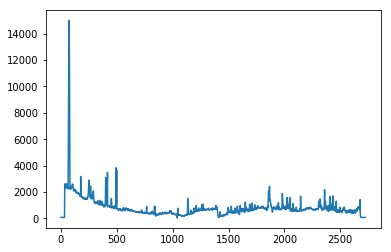

In [14]:
plt.plot(scispect)

In [5]:
stdpath = '/home/ryan/projects/KASTr_data/raw/1April2019/red/telluric/r1081.fits'

stdspec, stdvar, stdpmod, stdpfit, stdprof, stdslcs, b_spec = reduce_standard(stdpath, median_biasframe, norm_flat, image_mask, 30, 0.1)

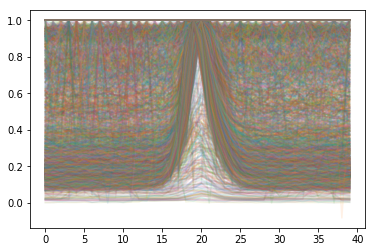

In [16]:
import pandas as pd

norm_sci_slcs = copy.deepcopy(scislcs)

for i in range(len(norm_sci_slcs)):
    norm_sci_slcs[i] = norm_sci_slcs[i] / np.amax(norm_sci_slcs[i])
    
    plt.plot(norm_sci_slcs[i], alpha=0.1)
    
wow = pd.DataFrame(norm_sci_slcs)

wow.to_csv('output.csv', index=False, header=False)


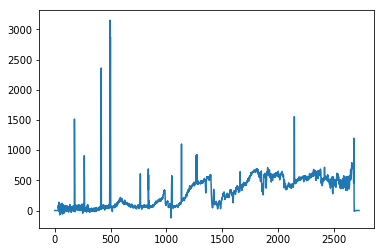

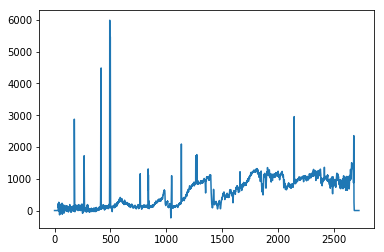

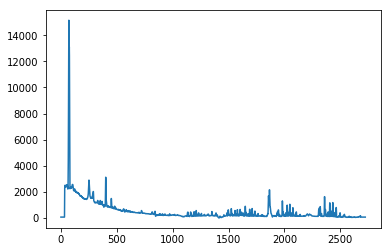

In [9]:
plt.plot(scispect)
plt.show()
plt.plot(scivar)
plt.show()
plt.plot(sci_bkg)
plt.show()

In [8]:
scipath = '/home/ryan/projects/KASTr_data/raw/1April2019/red/science/r1078.fits'
scispect, scivar, scislcs, sciprof, sci_bkg = reduce_science(scipath, median_biasframe, norm_flat, image_mask, 30, stdpfit, stdpmod, 0.4)

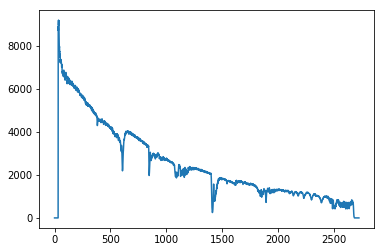

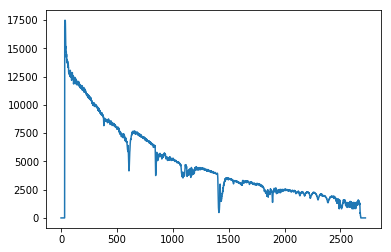

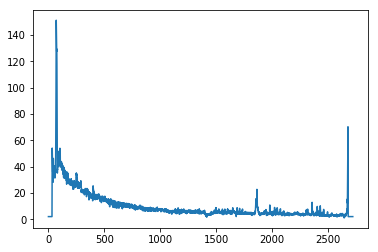

In [6]:
plt.plot(stdspec)
plt.show()
plt.plot(stdvar)
plt.show()
plt.plot(b_spec)
plt.show()

In [4]:
def reduce_standard(image_path, bias_frame, normalized_flat, mask, px_thresh, bkg_percent_thresh):
    
    image_file = fits.open(image_path)
    
    image_data = copy.deepcopy(image_file[0].data)
    
    bias_subtracted_image = bias_subtract(image_data, bias_frame)
    
    image_variance = variance_image(bias_subtracted_image)
    
    normalized_image = flat_normalize_image(bias_subtracted_image, normalized_flat, mask)
    
    normalized_variance = flat_normalize_image(image_variance, normalized_flat, mask)
    
    masked_image = mask_image(normalized_image, mask)
    
    masked_variance = mask_image(normalized_variance, mask)
    
    poly_slit_model = slit_fit_model(masked_image)
    
    poly_slit_trace = np.poly1d(poly_slit_model)
    
    image_slices = gen_cent_slc(masked_image, poly_slit_trace, px_thresh)
    
    variance_slices = gen_cent_slc(masked_variance, poly_slit_trace, px_thresh)
    
    spatial_profile = create_norm_spatial_profile(image_slices)
    
    bsubtracted_image_slices, background_spec = background_subtract(image_slices, spatial_profile, bkg_percent_thresh)
    
    bsubtracted_variance_slices, vbackground_spec = background_subtract(variance_slices, spatial_profile, bkg_percent_thresh)
    
    extraction_weight = weight_function(bsubtracted_image_slices)
    
    spect = extract_spectrum(bsubtracted_image_slices, extraction_weight)
    
    variance = extract_variance(bsubtracted_variance_slices, extraction_weight)
    
    return spect, variance, poly_slit_model, poly_slit_trace, spatial_profile, image_slices, background_spec

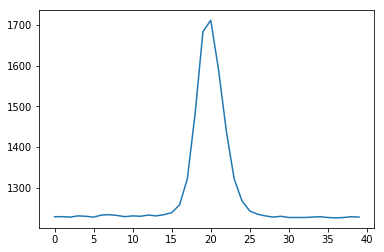

20

In [13]:
sci_im = copy.deepcopy(fits.open(scipath)[0].data)

cent_slc_attempt = gen_cent_slc(sci_im, stdpfit, 20)

plt.plot(np.median(cent_slc_attempt, axis=0))
plt.show()

np.argmax(np.median(cent_slc_attempt, axis=0))

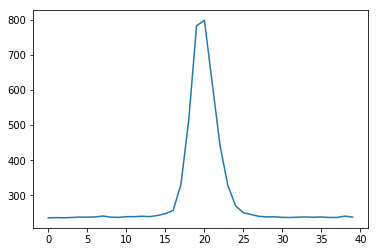

In [48]:
plt.plot(np.median(scislcs, axis=0))

actual_center = np.median(scislcs, axis=0)

In [15]:
stdpmod

array([-4.64332574e-13,  2.65672227e-09, -3.45381551e-06,  1.20520812e-03,
        2.07505869e+02])

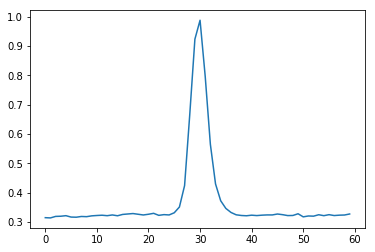

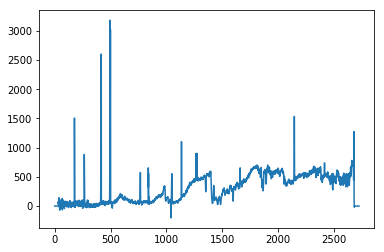

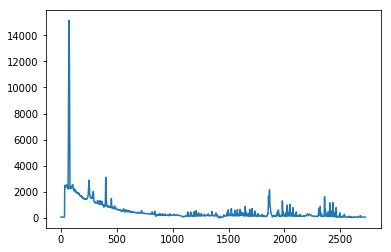

In [13]:
plt.plot(sciprof)
plt.show()

subtr_sci, back_spec = background_subtract(scislcs, sciprof, 0.5)

subtrsciw = weight_function(scislcs)

subtr_sp = extract_spectrum(subtr_sci, subtrsciw)

plt.plot(subtr_sp)
plt.show()

plt.plot(back_spec)
plt.show()

In [5]:
def background_subtract(c_slc, sp_prof, percent_threshold):
        
    cent_slc = copy.deepcopy(c_slc)
    
    #empty lists to hold the background slices and their indices
    background_slices = []
    #background_indices = []
    
    #first pass subtraction

    '''
       deciding which pixels are background
       background pixels are areas where the spatial
       profile is less than the given threshold
    '''
    for i in range(len(cent_slc)):
        
        #setting up empty lists to hold the background pixels and their indices
        background_px = []
        #background_ix = []
        
        #if the pixel value in the slice is less than the threshold, it's background
        for j in range(len(cent_slc[i])):
            if (sp_prof[j] < percent_threshold):
                background_px.append(cent_slc[i][j])
                #background_ix.append(j)
        #appending the pixels and indices from this slice to the list for all slices
        
        #if the list isn't empty, append it, otherwise append zeros
        if background_px != []:
            background_slices.append(background_px)
            #background_indices.append(background_ix)
        else:
            background_slices.append(np.zeros(len(cent_slc[i])))
            #background_indices.append(range(len(cent_slc[i])))
    
    #empty list to hold the background value
    background_vals = []
    
    '''
    #for each slice, find the median of the background
    for i in range(len(background_slices)):
        background_fits.append(np.poly1d(np.polyfit(background_indices[i], background_slices[i], 1)))
    '''
    
    #for each slice, find the median and store it
    for i in range(len(background_slices)):
        background_vals.append(np.median(background_slices[i]))
        
    
    
    '''
    #setting up for iteration
    
    
    bkg_fits = copy.deepcopy( background_fits )
    
    #iterate 10 times
    for n in range(10):
        
        #effectively the same process as above
        bkg_slices = []
        bkg_indices = []
        
        for i in range(len(cent_slc)):
            
            slc_max = np.amax(cent_slc[i])
            bkg_px = []
            bkg_ix = []
            
            #if the pixel value in the slice is less than 10% the difference between the maximum in the slice
            #and the previous background fit, it's also background
            for j in range(len(cent_slc[i])):
                if (np.divide(cent_slc[i][j], slc_max - bkg_fits[i](j)) < 0.1):
                    bkg_px.append(cent_slc[i][j])
                    bkg_ix.append(j)
            if bkg_px != []:
                bkg_slices.append(bkg_px)
                bkg_indices.append(bkg_ix)
                
            else:
                bkg_slices.append(np.zeros(len(cent_slc[i])))
                bkg_indices.append(range(len(cent_slc[i])))
        
        #creating new fits based on the newly selected background
        for i in range(len(bkg_slices)):
            bkg_fits[i] = np.poly1d(np.polyfit(bkg_indices[i], bkg_slices[i], 1))            
        
    '''            
    #the signal is the difference between the centered slices and the background
    signal_slc = copy.deepcopy(cent_slc)
        
    for i in range(len(signal_slc)):
        signal_slc[i] = signal_slc[i] - background_vals[i]
    
    return signal_slc, background_vals


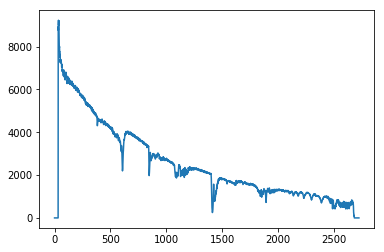

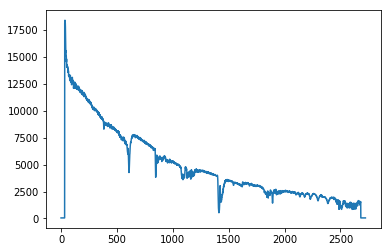

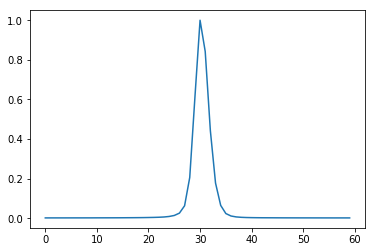

In [9]:
plt.plot(stdspec)
plt.show()

plt.plot(stdvar)
plt.show()

plt.plot(stdprof)
plt.show()

In [39]:
new_mod = copy.deepcopy(stdpmod)

new_mod[4] = new_mod[4] + 100

new_fit = np.poly1d(new_mod)

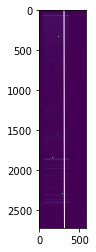

In [40]:
xrange = range(len(sci_im[:,0]))
fig, ax = plt.subplots()
ax.imshow(sci_im)
ax.plot(new_fit(xrange), xrange, color = 'w', linewidth=1)

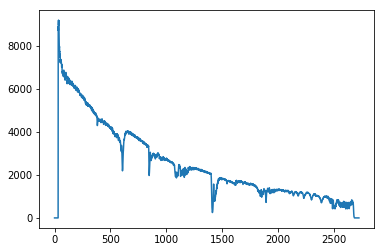

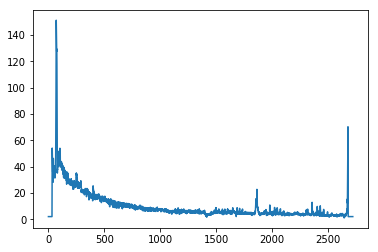

In [11]:
subtr_slcs, back_spec = background_subtract(stdslcs, stdprof, 0.1)

subtrw = weight_function(subtr_slcs)

subtr_spect = extract_spectrum(subtr_slcs, subtrw)

plt.plot(subtr_spect)
plt.show()

plt.plot(back_spec)
plt.show()

In [47]:
    cent_slc = []
    
    for i in range(len(sci_im[:,0])):
        slc = sci_im[i,:]
        
        cent_slc.append(slc[ int(np.around(stdpfit(i) - 10)):int(np.around(stdpfit(i) + 30))])

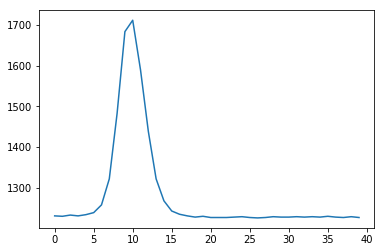

In [48]:
plt.plot(np.median(cent_slc, axis=0))

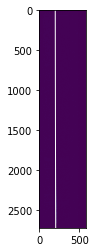

In [66]:
shifted_model = slit_fit_shift(cent_slc, stdpmod, 20)

shifted_poly = np.poly1d(shifted_model)

std_im = copy.deepcopy(fits.open(stdpath)[0].data)

xrange = range(len(std_im[:,0]))
fig, ax = plt.subplots()
ax.imshow(std_im)
ax.plot(shifted_poly(xrange), xrange, color = 'w', linewidth=1)

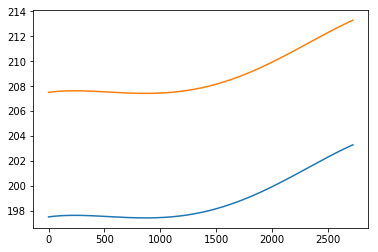

In [67]:
plt.plot(xrange, shifted_poly(xrange))

plt.plot(xrange, stdpfit(xrange))

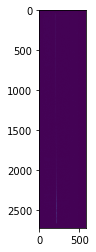

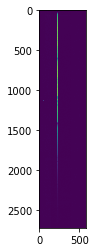

In [24]:
std_im = copy.deepcopy(fits.open(stdpath)[0].data)
shift_im = np.roll(std_im, 20, axis=1)

plt.imshow(std_im)
plt.show()
plt.imshow(shift_im)
plt.show()

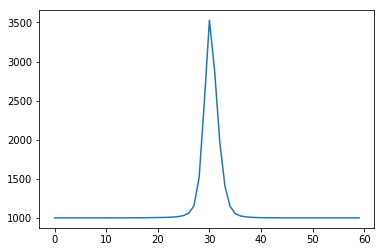

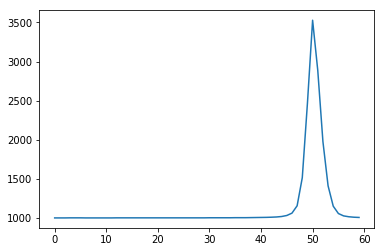

In [27]:
good_slc = gen_cent_slc(std_im, stdpfit, 30)

shift_slc = gen_cent_slc(shift_im, stdpfit, 30)

plt.plot(np.median(good_slc, axis=0))
plt.show()

plt.plot(np.median(shift_slc, axis=0))
plt.show()

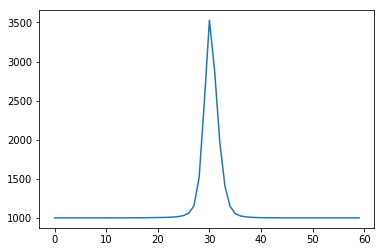

In [32]:
new_mod = slit_fit_shift(shift_slc, stdpmod, 30)
new_fit = np.poly1d(new_mod)

new_slc = gen_cent_slc(shift_im, new_fit, 30)

plt.plot(np.median(new_slc, axis=0))

In [33]:
new_mod

array([-4.64332574e-13,  2.65672227e-09, -3.45381551e-06,  1.20520812e-03,
        2.27505869e+02])